# AI Project 1: Phishing Website Detection  
**Course:** DS 7331 – Artificial Intelligence I 
**Team Members:** Johnny Vogt, Drew Nunnally, Devin Streeter, Mike Flores  
**Date:** 1/25/2026

---

## Business Understanding

Phishing attacks are a significant cybersecurity threat in which malicious websites attempt to deceive users into revealing sensitive information such as login credentials, financial data, or personal information. These attacks have proven effective at bypassing human intuition, even among vigilant users, and often result in financial loss or reputational damage. As phishing techniques continue to evolve, automated detection methods are increasingly necessary to protect users and organizations.

The dataset used in this project consists of URLs accompanied by a variety of attributes describing both the structure of the URL and characteristics of the associated website. Each URL is assigned a binary label indicating whether it is classified as a **phishing** or **legitimate** website (1 = legitimate, 0 = phishing). The dataset was collected to support the study and detection of phishing websites and to enable the development of predictive models that can identify malicious links before users interact with them.

The primary objective of this analysis is to understand how individual features relate to the phishing classification and to determine which attributes are most informative for distinguishing between legitimate and phishing websites. If meaningful differences exist between the patterns of phishing and legitimate URLs, then the dataset provides useful information for building effective prediction models. Preliminary feature correlations, such as indicators related to copyright information, social network presence, and special character usage in URLs, suggest that certain attributes may be associated with specific classifications.

A successful prediction model in this context prioritizes the accurate detection of phishing websites while minimizing misclassification of legitimate sites. From a practical standpoint, false negatives—failing to identify phishing links—pose a greater risk than false positives, as undetected phishing attacks can lead to significant security breaches and financial harm. Therefore, this exploratory analysis focuses on understanding the structure, distributions, and relationships within the data to support effective phishing detection in subsequent modeling efforts.

**Source:**  
Prasad, A., & Chandra, S. (2023). *PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning*. Computers & Security, 103545. https://doi.org/10.1016/j.cose.2023.103545


## Data Understanding
### Attribute Meaning and Data Type

The features in this dataset represent characteristics commonly associated with phishing behavior in website URLs and webpage content. These attributes capture structural, lexical, and contextual properties that can help distinguish malicious websites from legitimate ones.

Many of the features describe observable properties of a URL, such as the presence of special characters, abnormal URL length, or the use of IP addresses instead of domain names. Other attributes relate to webpage behavior or metadata, including the presence of security certificates, external resource links, or references to trusted domains. Together, these features provide a structured representation of patterns that are often exploited in phishing attacks.

Most attributes are encoded as binary or categorical indicators, reflecting whether a specific condition is present or absent. This encoding simplifies feature interpretation and supports classification-based learning methods by emphasizing the presence of risk signals rather than raw textual content.

### Identification and Text Attributes

**FILENAME**  
Identifier corresponding to the original text file or record associated with the URL.

**URL**  
The complete website address, including protocol, domain, and path information.

**Domain**  
The primary domain portion of the URL, representing the core website identity.

**TLD**  
The top-level domain of the URL (e.g., `.com`, `.org`, `.net`).

**Title**  
The HTML page title associated with the website.

### Length-Based Attributes (Numeric)

**URLLength**  
Total number of characters in the full URL.

**DomainLength**  
Number of characters in the domain portion of the URL.

**TLDLength**  
Number of characters in the top-level domain.

**NoOfSubDomain**  
Count of subdomains present within the URL.

**NoOfObfuscatedChar**  
Number of obfuscated characters appearing in the URL.

**NoOfLettersInURL**  
Count of alphabetic characters (A–Z, a–z) in the URL.

**NoOfDigitsInURL**  
Count of numeric digits appearing in the URL.

**NoOfEqualsInURL**  
Count of equals (`=`) characters in the URL.

**NoOfQMarkInURL**  
Count of question mark (`?`) characters in the URL.

**NoOfAmpersandInURL**  
Count of ampersand (`&`) characters in the URL.

**NoOfOtherSpecialCharsInURL**  
Count of special characters in the URL excluding common delimiters.

**LineOfCode**  
Total number of lines of HTML code present on the webpage.

**LargestLineLength**  
Length of the longest line of HTML code on the webpage.

**NoOfURLRedirect**  
Number of URL redirections encountered when accessing the page.

**NoOfSelfRedirect**  
Number of redirections that point back to the same domain.

**NoOfPopup**  
Number of popup windows detected on the webpage.

**NoOfiFrame**  
Number of embedded iframe elements on the webpage.

**NoOfImage**  
Total number of image elements referenced on the page.

**NoOfCSS**  
Number of external CSS files linked to the webpage.

**NoOfJS**  
Number of JavaScript files referenced by the webpage.

**NoOfSelfRef**  
Number of internal links that reference the same domain.

**NoOfEmptyRef**  
Number of links with empty or missing references.

**NoOfExternalRef**  
Number of links pointing to external domains.

### Ratios, Probabilities, and Similarity Scores (Numeric)

**URLSimilarityIndex**  
Similarity score between the URL and a reference index of known URLs.

**CharContinuationRate**  
Measure of character repetition patterns indicating randomness or obfuscation.

**TLDLegitimateProb**  
Estimated probability that the top-level domain is associated with legitimate websites.

**URLCharProb**  
Probability score derived from the distribution of characters within the URL.

**ObfuscationRatio**  
Proportion of obfuscated characters relative to the total URL length.

**LetterRatioInURL**  
Ratio of alphabetic characters relative to the total URL length.

**DigitRatioInURL**  
Ratio of numeric characters relative to the total URL length.

**SpecialCharRatioInURL**  
Ratio of special characters relative to the total URL length.

**DomainTitleMatchScore**  
Similarity score between the domain name and the webpage title text.

**URLTitleMatchScore**  
Similarity score between the full URL text and the webpage title.

### Binary Flag Attributes (1 = Yes, 0 = No)

**IsDomainIP**  
Indicates whether the domain is represented as an IP address.

**HasObfuscation**  
Indicates the presence of obfuscation patterns within the URL.

**IsHTTPS**  
Indicates whether the URL uses the HTTPS protocol.

**HasTitle**  
Indicates whether the webpage contains a non-empty HTML title tag.

**HasFavicon**  
Indicates whether the website includes a favicon.

**Robots**  
Indicates the presence of a `robots.txt` file.

**IsResponsive**  
Indicates whether the webpage is responsive or adaptive to different devices.

**HasDescription**  
Indicates whether the page contains a meta description tag.

**HasExternalFormSubmit**  
Indicates whether a form submits data to an external domain.

**HasSocialNet**  
Indicates the presence of social media links on the webpage.

**HasSubmitButton**  
Indicates the presence of submit buttons on the page.

**HasHiddenFields**  
Indicates the presence of hidden form fields.

**HasPasswordField**  
Indicates the presence of password input fields.

**Bank**  
Indicates whether the webpage content relates to banking topics.

**Pay**  
Indicates whether the webpage content relates to payment services.

**Crypto**  
Indicates whether the webpage content relates to cryptocurrency.

**HasCopyrightInf**  
Indicates the presence of copyright information on the webpage.

### Target Variable

**label**  
Binary class label where `1` indicates a legitimate website and `0` indicates a phishing website.

## Load Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Display utilities
from IPython.display import display

In [2]:
# Import dataset
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

## Display dataset dimensions (rows, columns)

In [3]:
rows, cols = df.shape
print(f"The dataset contains {rows:,} rows and {cols} columns.")

The dataset contains 235,795 rows and 56 columns.


## Preview first 5 rows & last 5 rows

In [4]:
display(df.head())

display(df.tail())

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

FILENAME                                                URL  \
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
235790         29                           www.skincareliving.com   
235791         28                            www.winchester.gov.uk   
235792         30                          www.nononsensedesign.be   
235793         55  patient-cell-40f5.updatedlogmylogin.workers.dev   
235794         33                       www.alternativefinland.com   

        DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
235790            22           0  com          100.000000   
235791            21           0   uk          100.000000   
235792            23           0   be          100.000000   
235793            47           0  dev           28.157537   
235794            26           0  com          100.000000   

        CharContinuationRate  TLDLegitimateProb  ...  Pay  Crypto  \
235790              1.000000           0.522907  ...    1       0   
235791              0.785714           0.028555  ...    1       0   
235792              1.000000           0.003319  ...    0       0   
235793              0.465116           0.000961  ...    0       0   
235794              1.000000           0.522907  ...    0       0   

        HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
235790                 1         51        7      21          187   
235791                 0         50        1       7           88   
235792                 1         27       10      30           58   
235793                 0          0        0       3            0   
235794                 1         21        6      18          256   

        NoOfEmptyRef  NoOfExternalRef  label  
235790             2              191      1  
235791             0               31      1  
235792             2               67      1  
235793             0                0      0  
235794             0              261      1  

[5 rows x 56 columns]

## View data structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

Based on the output of `df.info()`, the dataset contains 41 integer features, 10 floating-point numerical features, and 5 categorical (object-type) features.

## View summary statistics for nummeric columns

In [6]:
df.describe()
# Counts how many times each class appears
# df['label'].value_counts()
# Convert counts into proportions
# df['label'].value_counts(normalize=True)

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...            Pay         Crypto  \
count  235795.000000   235795.000000  ...  235795.000000  235795.000000   
mean        1.164758        0.002057  ...       0.237007       0.023474   
std         0.600969        0.045306  ...       0.425247       0.151403   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       0.000000       0.000000   
75%         1.000000        0.000000  ...       0.000000       0.000000   
max        10.000000        1.000000  ...       1.000000       1.000000   

       HasCopyrightInfo      NoOfImage        NoOfCSS         NoOfJS  \
count     235795.000000  235795.000000  235795.000000  235795.000000   
mean           0.486775      26.075689       6.333111      10.522305   
std            0.499826      79.411815      74.866296      22.312192   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       8.000000       2.000000       6.000000   
75%            1.000000      29.000000       8.000000      15.000000   
max            1.000000    8956.000000   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  
count  235795.000000  235795.000000    235795.000000  235795.000000  
mean       65.071113       2.377629        49.262516       0.571895  
std       176.687539      17.641097       161.027430       0.494805  
min         0.000000       0.000000         0.000000       0.000000  
25%         0.000000       0.000000         1.000000       0.000000  
50%        12.000000       0.000000        10.000000       1.000000  
75%        88.000000       1.000000        57.000000       1.000000  
max     27397.000000    4887.000000     27516.000000       1.000000  

[8 rows x 51 columns]

Summary Statistics of Important Variables

Through preliminary analysis, several attributes emerge as strong candidates for influencing predictive model performance. The features below represent visually and statistically distinguishable characteristics that show substantial separation between phishing and legitimate websites.

Based on the summary statistics, legitimate websites tend to exhibit greater structural complexity, including the use of HTTPS, the presence of page descriptions, links to social media platforms, and a large number of external references. In contrast, phishing websites tend to have simpler HTML structures, fewer external connections, and longer or more irregular URLs. Phishing sites also occasionally include obfuscated characters, while legitimate sites almost never do.

Features:
IsHTTPS (Binary)
- Mean
   - (0): 0.4922
   - (1): 1

HasDescription (Binary)
- Mean
  - (0): 0.0442
  - (1): 0.7366
  
HasSocialNet (Binary)
- Mean
  - (0):0.0051
  - (1):0.7946

URLLength (Numeric)
- Min
  - (0):13
  - (1):15
- Q1
  - (0):26
  - (1):23
- Median
  - (0):34
  - (1):26
- Mean
  - (0):45.7203
  - (1):26.2286
- Q3
  - (0):48
  - (1):29
- Max
  - (0):6097
  - (1):57
- Range
  - (0): 6084
  - (1):42

NoOfObfuscatedChar (Numeric)
- Min
  - (0):0
  - (1):0
- Q1
  - (0):0
  - (1):0
- Median
  - (0):0
  - (1):0
- Mean
  - (0):0.581
  - (1):0
- Q3
  - (0):44
  - (1):0
- Max
  - (0):447
  - (1):0
- Range
  - (0):447
  - (1):0

LineOfCode (Numeric)
- Min
  - (0): 2
  - (1): 102
- Q1
  - (0): 2
  - (1): 613
- Median
  - (0): 12
  - (1): 1105
- Mean
  - (0): 65.73305
  - (1): 1947.4917
- Q3
  - (0): 90
  - (1): 2088
- Max
  - (0): 29687
  - (1): 442666
- Range
  - (0): 29685
  - (1): 442564

NoOfExternalRef (Numeric)
- Min
  - (0):0
  - (1): 0
- Q1
  - (0):0
  - (1): 17
- Median
  - (0):0
  - (1): 46
- Mean
  - (0):1.1281
  - (1): 85.2946
- Q3
  - (0):2
  - (1): 106
- Max
  - (0):368
  - (1): 27516
- Range
  - (0):368
  - (1): 27516

CharContinuationRate (Numeric)
- Min
  - (0): 0.0377
  - (1): 0
- Q1
  - (0): 0.5455
  - (1): 1
- Median
  - (0): 0.7273
  - (1): 1
- Mean
  - (0): 0.7284
  - (1): 0.9332
- Q3
  - (0):1
  - (1): 1
- Max
  - (0):1
  - (1): 1
- Range
  - (0): 0.9623
  - (1): 1    

## Check for missing data

In [7]:
# Check for completely empty rows
empty_rows = df.isna().all(axis=1)
print("Number of completely empty rows:")
display(empty_rows.sum())
print("Missing values per column:")
display(df.isna().sum())

Number of completely empty rows:


np.int64(0)

Missing values per column:


FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

The dataset contains no missing values, as there are zero completely empty rows and no missing values across all columns.

## Check for duplicate data

In [20]:
# Check for duplicate rows (pre-cleaned), entire row must be identical across all columns.
print("Duplicate Rows")
# This counts ONLY exact row level duplicates
display(df.duplicated().sum())

print("Duplicate URLs (only)")
# Many URLs appear more than once, but with small differences in feature values
# (e.g., URLLength differs by 1 due to data collection timing or parsing)
# These are NOT full row duplicates, only URL-level duplicates
# Count duplicate values based only on the URL column
# It is safe to just drop all duplicates
display(df.duplicated(subset=["URL"]).sum())

Duplicate Rows


np.int64(0)

Duplicate URLs (only)


np.int64(425)

Duplicates Summary

A total of **425 duplicate URLs** were identified in the dataset. These duplicates correspond to repeated occurrences of the same URL while exhibiting minor variations in certain feature values. As a result, these records are not exact row-level duplicates but represent multiple observations associated with the same URL.

To avoid potential bias and redundancy in downstream analysis, duplicate URLs were removed by retaining only the first occurrence of each URL. The number of removed records represents approximately **0.18%** of the dataset, and therefore this preprocessing step is not expected to materially affect the overall analysis or modeling results.


Deal with the duplicate URLs by dropping the duplicate and keeping the first occurence.

In [44]:
# Drop the duplicate URLs code
# Identify duplicate URLs
dup_url_mask = df.duplicated(subset=["URL"], keep=False)

# Remove duplicate URLs (keep the first occurrence)
df_dedup = df.drop_duplicates(subset=["URL"], keep="first")

rows, cols = df_dedup.shape
print(f"After dropping the duplicate URLs, the dataset contains {rows:,} rows and {cols} columns.")

After dropping the duplicate URLs, the dataset contains 235,370 rows and 56 columns.


## Target Variable Distribution

Using the **de-duplicated URL** dataset, the following analysis summarizes the distribution of the target variable to assess class balance prior to model development.

Target Variable Distribution:
  1 (Legitimate): 134,850 (57.29%)
  0 (Phishing): 100,520 (42.71%)

Targe Variable Imbalance Ratio: 1.34:1


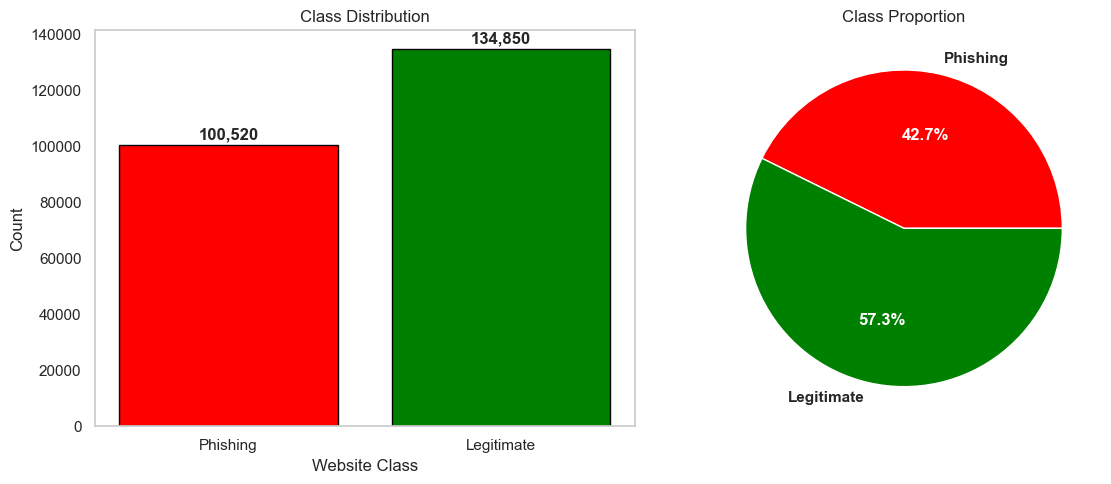

In [42]:
label_counts = df_dedup['label'].value_counts()
label_percentages = df_dedup['label'].value_counts(normalize=True) * 100
label_map = {0: "Phishing", 1: "Legitimate"}
print("Target Variable Distribution:")
print("="*40)
for label in label_counts.index:
    label_name = label_map.get(label, str(label))
    print(f"  {label} ({label_name}): {label_counts[label]:,} ({label_percentages[label]:.2f}%)")

# Imbalance ratio
imbalance_ratio = label_counts.max() / label_counts.min()
print(f"\nTarge Variable Imbalance Ratio: {imbalance_ratio:.2f}:1")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Label map
class_labels = ['Phishing', 'Legitimate']
class_counts = [label_counts.loc[0], label_counts.loc[1]]
colors = ['red', 'green']  # Green for legitimate, red for phishing

# Bar plot
ax1 = axes[0]
ax1.grid(False)
bars = ax1.bar(class_labels, class_counts, color=colors, edgecolor='black')
ax1.set_xlabel('Website Class')
ax1.set_ylabel('Count')
ax1.set_title('Class Distribution')
for bar, count in zip(bars, class_counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(class_counts, labels=class_labels,autopct='%1.1f%%', colors=colors,)
ax2.set_title('Class Proportion')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
for text in texts:
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()

Summary

The dataset contains a moderate class imbalance, with legitimate websites representing 57.29% of observations and phishing websites accounting for 42.71%.
The class imbalance ratio of the target variable is approximately 1.34:1, indicating a mild imbalance favoring legitimate websites.

## Statistical summary of numeric features (post de-duplication)

This section provides descriptive summary statistics for all numeric features in the de-duplicated dataset. By examining measures of central tendency, dispersion, and distribution shape, we gain insight into feature behavior, identify skewed or zero-inflated variables, and establish a foundation for subsequent modeling and transformation decisions.


In [46]:
# Identify numeric features
exclude_cols = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label']
numeric_cols = df_dedup.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in exclude_cols]

print(f"Numeric Features: {len(numeric_cols)}")

# Summary statistics for numeric features
stats_df = df_dedup[numeric_cols].describe().T
stats_df['median'] = df_dedup[numeric_cols].median()
stats_df['skewness'] = df_dedup[numeric_cols].skew()
stats_df['IQR'] = stats_df['75%'] - stats_df['25%']

# Reorder
stats_df = stats_df[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'skewness']]
stats_df

Numeric Features: 50


count          mean       median  \
URLLength                   235370.0     34.545516    27.000000   
DomainLength                235370.0     21.456022    20.000000   
IsDomainIP                  235370.0      0.002702     0.000000   
URLSimilarityIndex          235370.0     78.497537   100.000000   
CharContinuationRate        235370.0      0.845900     1.000000   
TLDLegitimateProb           235370.0      0.260503     0.079963   
URLCharProb                 235370.0      0.055760     0.057979   
TLDLength                   235370.0      2.764269     3.000000   
NoOfSubDomain               235370.0      1.164957     1.000000   
HasObfuscation              235370.0      0.002052     0.000000   
NoOfObfuscatedChar          235370.0      0.024880     0.000000   
ObfuscationRatio            235370.0      0.000138     0.000000   
NoOfLettersInURL            235370.0     19.405600    14.000000   
LetterRatioInURL            235370.0      0.515749     0.519000   
NoOfDegitsInURL             235370.0      1.875732     0.000000   
DegitRatioInURL             235370.0      0.028516     0.000000   
NoOfEqualsInURL             235370.0      0.062327     0.000000   
NoOfQMarkInURL              235370.0      0.029422     0.000000   
NoOfAmpersandInURL          235370.0      0.025080     0.000000   
NoOfOtherSpecialCharsInURL  235370.0      2.335977     1.000000   
SpacialCharRatioInURL       235370.0      0.063249     0.050000   
IsHTTPS                     235370.0      0.782717     1.000000   
LineOfCode                  235370.0   1143.790602   431.000000   
LargestLineLength           235370.0  12644.281374  1091.000000   
HasTitle                    235370.0      0.861444     1.000000   
DomainTitleMatchScore       235370.0     50.214813    75.000000   
URLTitleMatchScore          235370.0     52.197177   100.000000   
HasFavicon                  235370.0      0.362191     0.000000   
Robots                      235370.0      0.266861     0.000000   
IsResponsive                235370.0      0.624888     1.000000   
NoOfURLRedirect             235370.0      0.133390     0.000000   
NoOfSelfRedirect            235370.0      0.040137     0.000000   
HasDescription              235370.0      0.440855     0.000000   
NoOfPopup                   235370.0      0.222080     0.000000   
NoOfiFrame                  235370.0      1.591341     0.000000   
HasExternalFormSubmit       235370.0      0.044058     0.000000   
HasSocialNet                235370.0      0.457395     0.000000   
HasSubmitButton             235370.0      0.414679     0.000000   
HasHiddenFields             235370.0      0.378209     0.000000   
HasPasswordField            235370.0      0.102107     0.000000   
Bank                        235370.0      0.127204     0.000000   
Pay                         235370.0      0.237248     0.000000   
Crypto                      235370.0      0.023491     0.000000   
HasCopyrightInfo            235370.0      0.487509     0.000000   
NoOfImage                   235370.0     26.120232     9.000000   
NoOfCSS                     235370.0      6.343251     2.000000   
NoOfJS                      235370.0     10.538697     6.000000   
NoOfSelfRef                 235370.0     65.187777    12.000000   
NoOfEmptyRef                235370.0      2.381162     0.000000   
NoOfExternalRef             235370.0     49.348936    10.000000   

                                      std        min         25%          50%  \
URLLength                       41.332730  13.000000   23.000000    27.000000   
DomainLength                     9.127733   4.000000   16.000000    20.000000   
IsDomainIP                       0.051912   0.000000    0.000000     0.000000   
URLSimilarityIndex              28.947899   0.155574   57.166667   100.000000   
CharContinuationRate             0.216384   0.000000    0.680000     1.000000   
TLDLegitimateProb                0.251618   0.000000    0.005977     0.079963   
URLCharProb                      0.010583   0.

In [12]:
# Highly skewed numeric features
highly_skewed = stats_df[abs(stats_df['skewness']) > 2].sort_values('skewness', ascending=False)

print("="*50)
print(highly_skewed[['mean', 'median', 'skewness']].to_string())

                                    mean  median    skewness
NoOfCSS                         6.333111     2.0  464.404031
NoOfObfuscatedChar              0.024861     0.0  204.684335
NoOfJS                         10.522305     6.0  140.435761
NoOfEqualsInURL                 0.062241     0.0  114.985479
NoOfEmptyRef                    2.377629     0.0  106.826225
NoOfAmpersandInURL              0.025056     0.0  106.717256
NoOfiFrame                      1.588638     0.0   97.677347
NoOfDegitsInURL                 1.881011     0.0   94.877574
NoOfPopup                       0.221765     0.0   84.952694
NoOfExternalRef                49.262516    10.0   65.900247
NoOfSelfRef                    65.071113    12.0   60.381378
NoOfLettersInURL               19.428919    14.0   58.402581
URLLength                      34.573095    27.0   53.321737
LineOfCode                   1141.900443   429.0   53.072297
LargestLineLength           12789.532624  1090.0   48.179926
NoOfOtherSpecialCharsInU

Interpretation of Highly Skewed Features

Several numeric features exhibit extreme right-skewed and zero-inflated distributions, with many variables having median values of zero and skewness values exceeding 100. This indicates that most observations lack these characteristics, while a small subset contains very large values that disproportionately influence the mean. The consistent pattern of mean values exceeding medians confirms the presence of heavy right tails, particularly in URL structure and HTML-related features such as URLLength, LineOfCode, and NoOfExternalRef. 

While these distributions deviate strongly from normality, the extreme values may represent meaningful discriminatory signals for phishing detection, suggesting that transformation or robust modeling approaches may be considered depending on model sensitivity to skewed inputs.

## Outlier detection
This section identifies outliers across numeric features using the Interquartile Range (IQR) method. For each variable, observations falling outside the 1.5×IQR bounds are counted and summarized as both totals and percentages, providing insight into the prevalence of extreme values and their potential impact on modeling.

In [47]:
def detect_outliers(df, columns):
    outlier_info = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_pct = len(outliers) / len(df) * 100
        
        outlier_info.append({
            'Feature': col,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': len(outliers),
            'Outlier_Pct': outlier_pct
        })
    
    return pd.DataFrame(outlier_info).sort_values('Outlier_Pct', ascending=False)

outlier_df = detect_outliers(df_dedup, numeric_cols)
print("Features with Most Outliers:")
outlier_df.head(15)

Features with Most Outliers:


Feature  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_Pct
8      NoOfSubDomain          1.0          1.0          57228    24.314059
41               Pay          0.0          0.0          55841    23.724774
14   NoOfDegitsInURL          0.0          0.0          51198    21.752135
15   DegitRatioInURL          0.0          0.0          51198    21.752135
21           IsHTTPS          1.0          1.0          51142    21.728343
48      NoOfEmptyRef         -1.5          2.5          38868    16.513574
34        NoOfiFrame         -1.5          2.5          34437    14.631007
24          HasTitle          1.0          1.0          32612    13.855632
30   NoOfURLRedirect          0.0          0.0          31396    13.338998
40              Bank          0.0          0.0          29940    12.720398
39  HasPasswordField          0.0          0.0          24033    10.210732
0          URLLength          6.5         50.5          22362     9.500786
49   NoOfExternalRef        -84.5        143.5          22306     9.476994
12  NoOfLettersInURL         -5.0         35.0          19541     8.302248
22        LineOfCode      -1873.5       3170.5          19234     8.171815

This section visualizes the features with the highest proportion of detected outliers using boxplots stratified by class label. By comparing phishing and legitimate websites side by side, these plots help assess whether extreme values are concentrated within a particular class and whether outliers may represent meaningful discriminatory patterns rather than random noise.

Label Encoding: {0: 'Phishing', 1: 'Legitimate'}


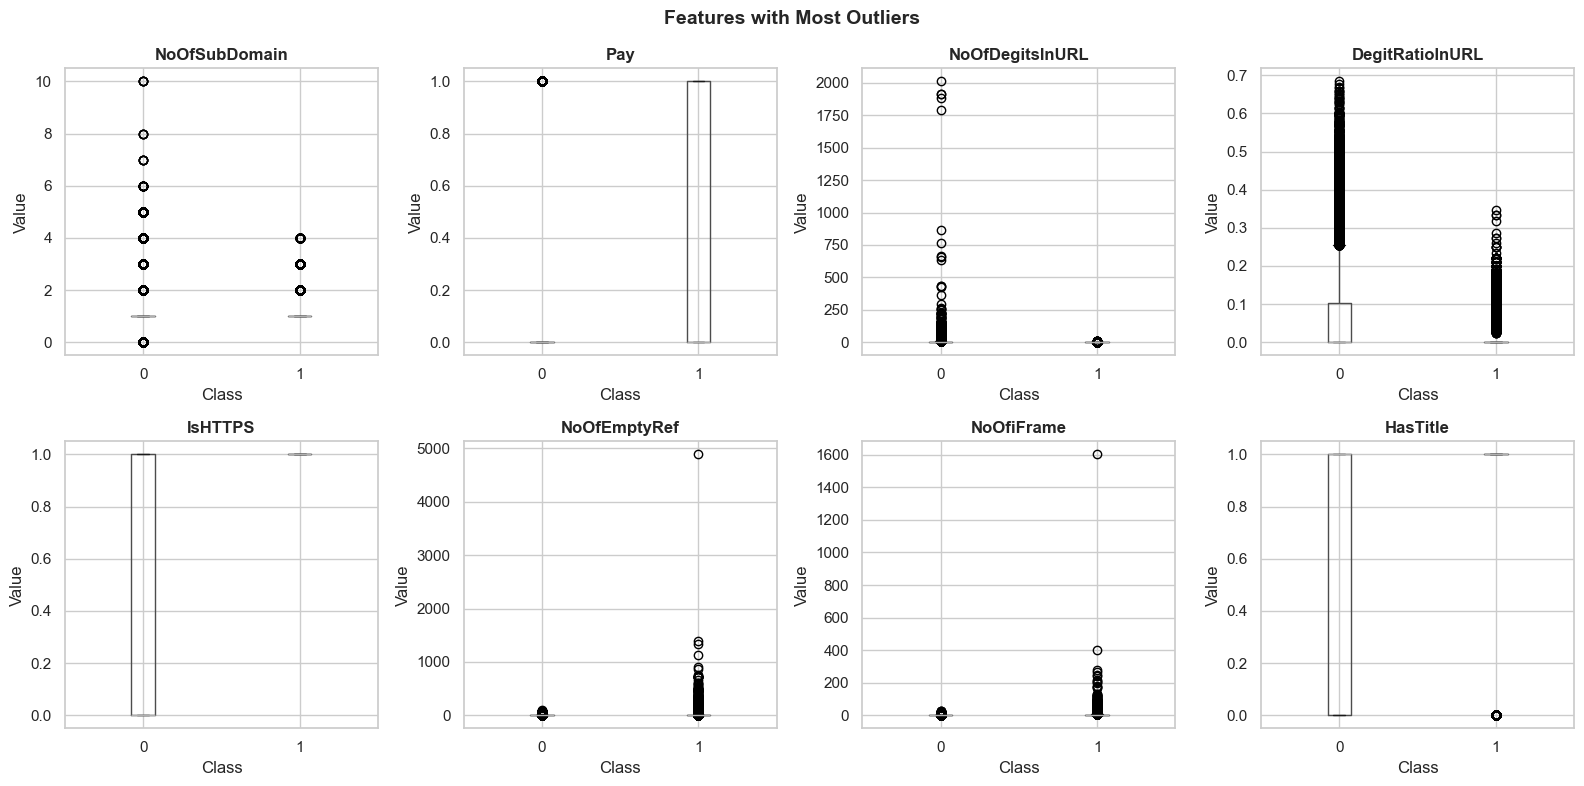

In [48]:
# Top outlier visualized
top_outlier_features = outlier_df.head(8)['Feature'].tolist()

# Label reminder
label_map = {0: "Phishing", 1: "Legitimate"}
print("Label Encoding:", label_map)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_outlier_features):
    ax = axes[idx]
    df_dedup.boxplot(column=feature, by='label', ax=ax)
    ax.set_title(feature, fontweight='bold')
    ax.set_xlabel('Class')
    ax.set_ylabel('Value')

plt.suptitle('Features with Most Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Interpretation of Outlier Patterns and Feature Behavior

The boxplots indicate that many outliers are not random noise but instead reflect systematic differences between phishing and legitimate websites, suggesting that these extreme values may serve as discriminative signals. In particular, features such as NoOfDegitsInURL and NoOfEmptyRef exhibit extreme values that occur predominantly in phishing URLs.

NoOfSubDomain

Both classes are heavily concentrated around a single subdomain; however, phishing URLs display a wider spread and more extreme values, indicating a greater tendency toward unusually deep or complex subdomain structures.

Pay
    
Although flagged as containing many “outliers,” this feature does not exhibit true extreme behavior. Instead, the pattern appears to be driven by class imbalance and binary structure rather than meaningful deviation.

NoOfDegitsInURL

Phishing URLs show substantially higher and more variable digit counts, with extreme values almost exclusively occurring in the phishing class, reinforcing its role as a strong indicator of suspicious URL structure.

DegitRatioInURL

Legitimate websites are tightly clustered near zero, while phishing URLs display a much wider spread, suggesting that numeric-heavy URLs are more common among phishing sites.

IsHTTPS
    
Legitimate websites almost always use HTTPS, while phishing URLs are split between secure and non-secure connections, reflecting inconsistent adoption of HTTPS among phishing sites.

NoOfEmptyRef

Extremely large values—sometimes exceeding several thousand—are concentrated in the phishing class, indicating abnormal or poorly formed HTML structures.

NoOfiFrame
    
Legitimate websites occasionally exhibit very large iframe counts, likely due to complex or content-heavy pages, whereas phishing sites typically have few or no iframes.

HasTitle
    
Legitimate websites almost always include a page title, while phishing websites occasionally lack this element, making title presence a potentially informative binary feature.

Modeling Consideration

Because many of these outliers align closely with phishing behavior, removing them could reduce model performance by discarding valuable signal. Instead of elimination, these features may benefit from robust modeling techniques or transformation strategies that preserve their discriminatory information.

## Exploratory analysis of phishing and legitimate URLs

Exploratory analysis shows clear differences between phishing and legitimate URLs across both binary and continuous features. Several indicators such as HTTPS usage, page metadata, and payment-related terms exhibit strong class separation. Continuous features reveal that phishing URLs often occupy wider or more extreme value ranges, while legitimate URLs cluster more tightly. Many extreme values appear predominantly in phishing samples, indicating meaningful signal rather than noise; therefore, no global outlier removal is performed prior to modeling.

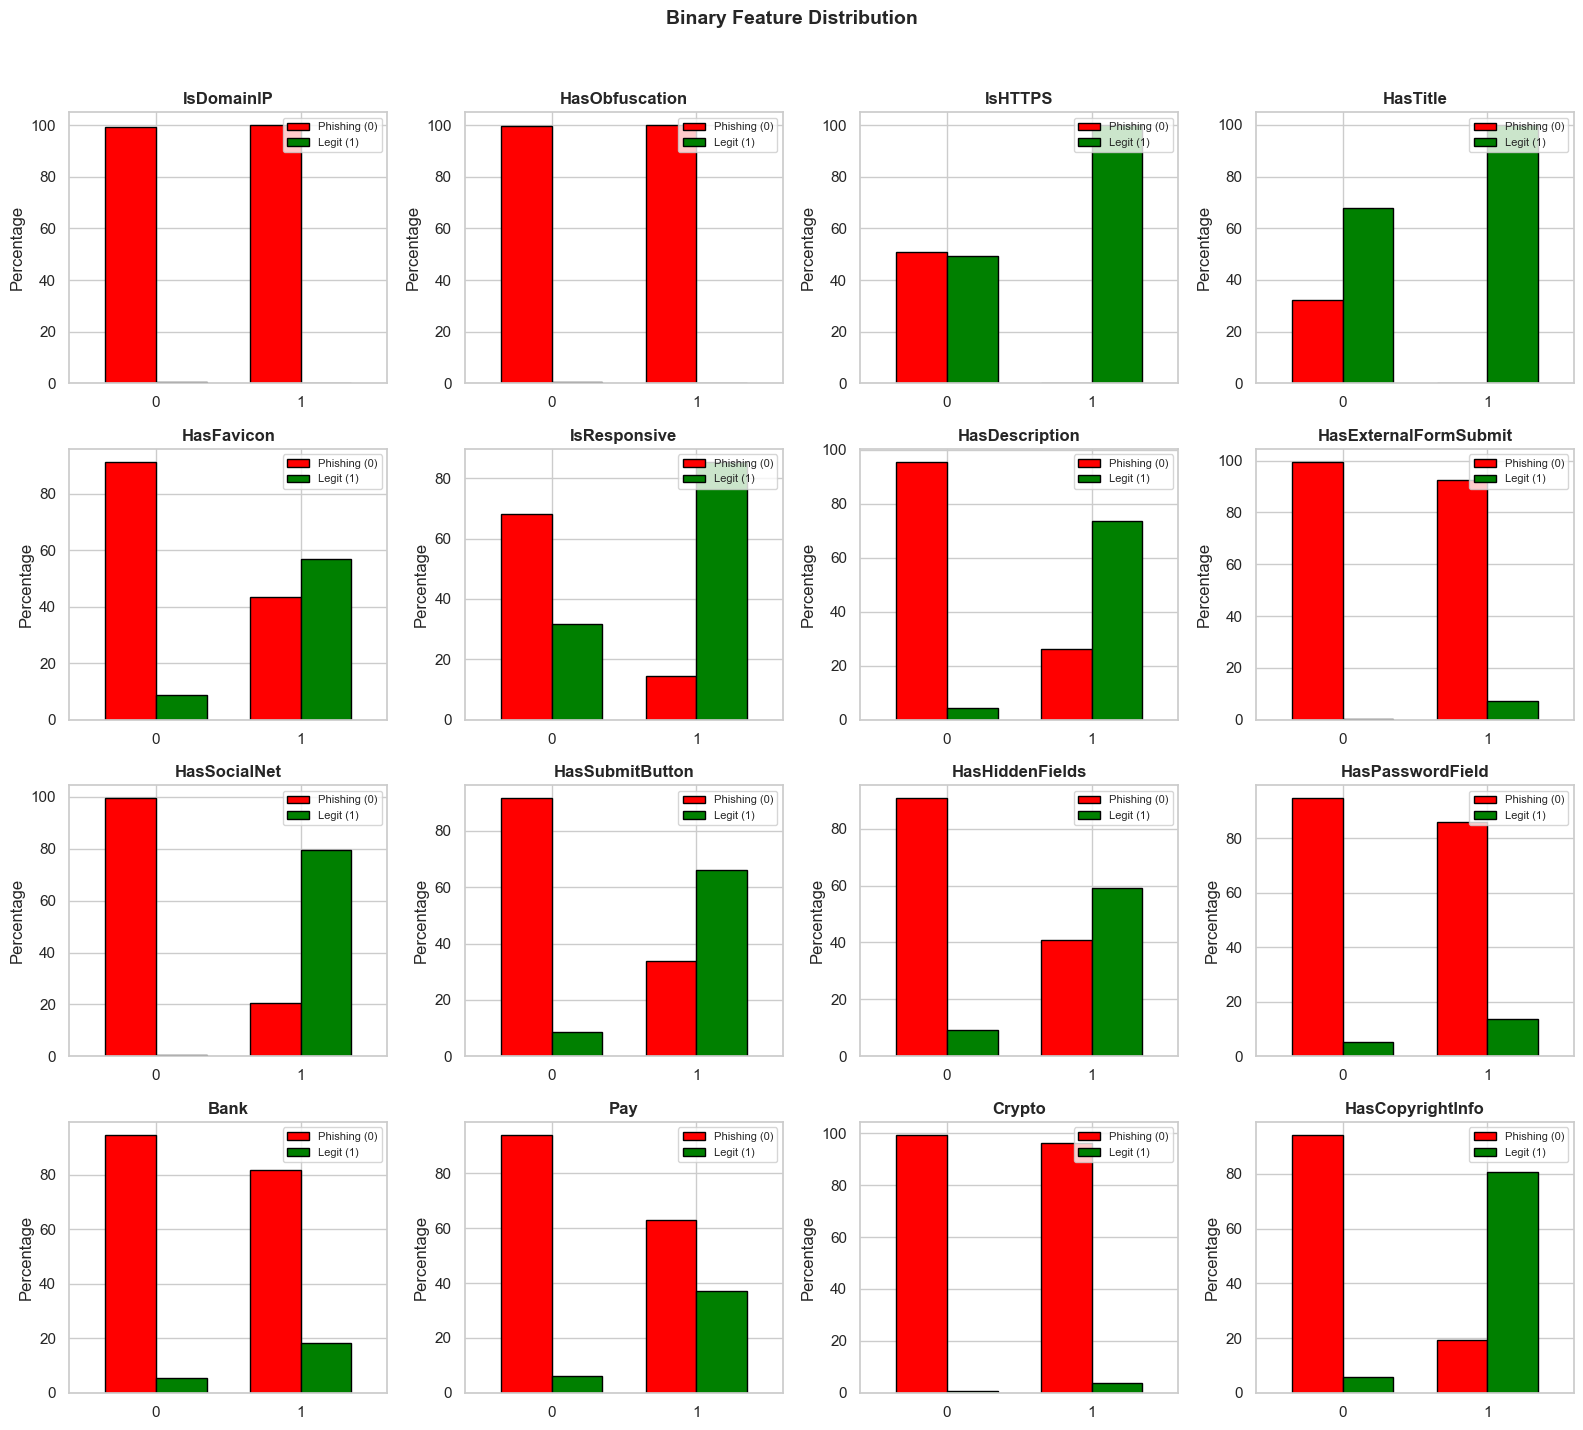

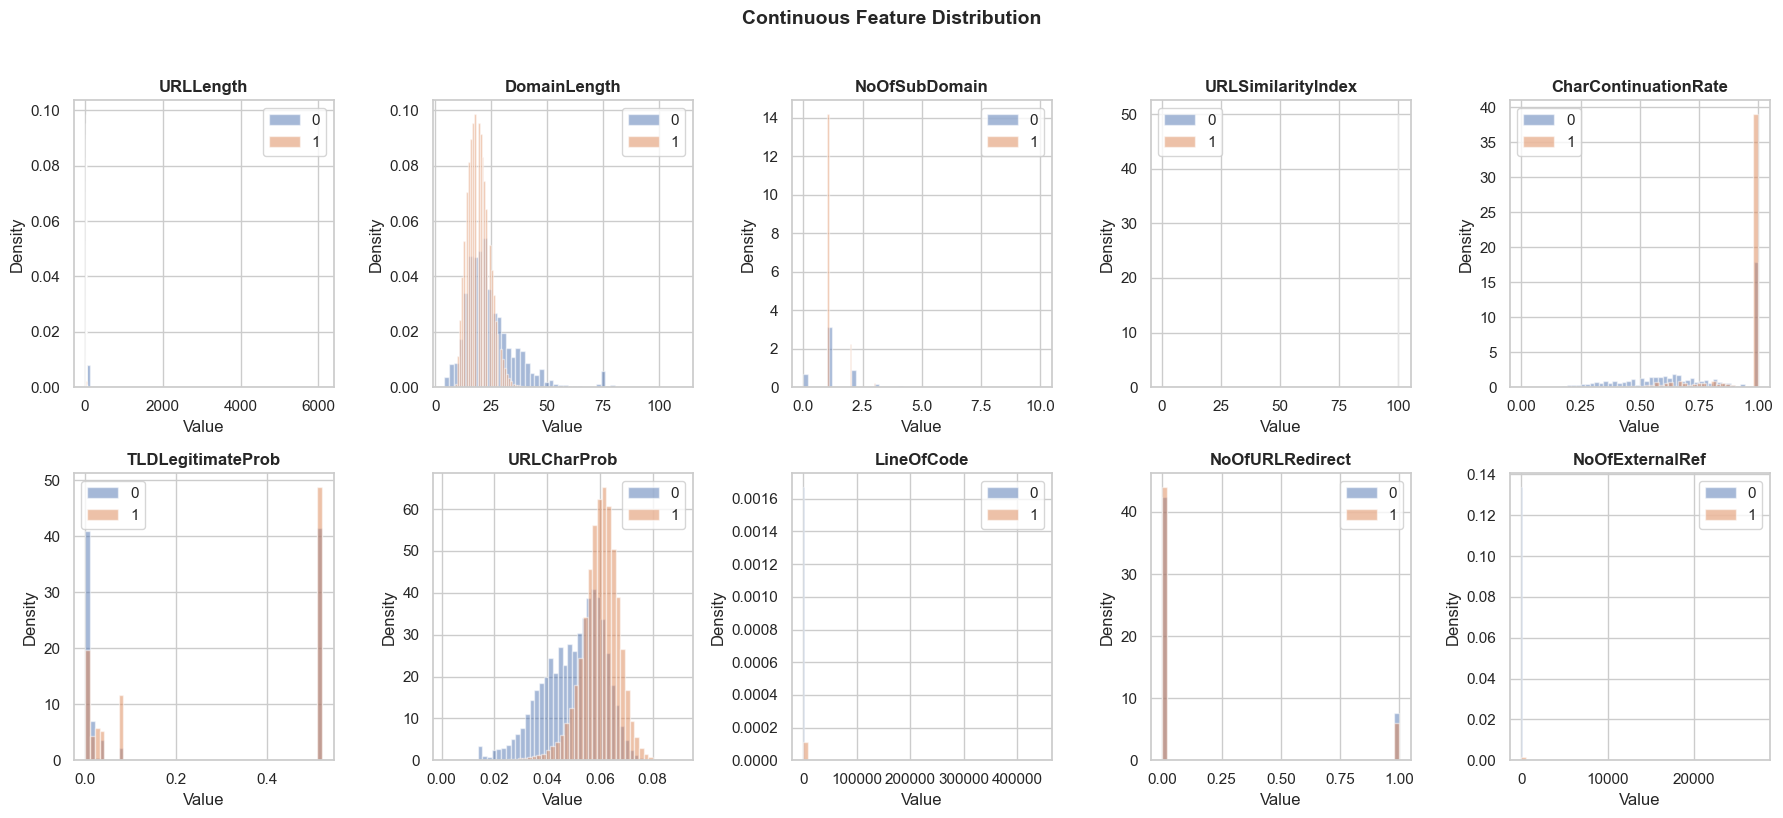

In [50]:
#Quick Charts to see data  Phishing vs. Legitimate

# Binary features
binary_features = ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 
                   'HasFavicon', 'IsResponsive', 'HasDescription',
                   'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
                   'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 
                   'Crypto', 'HasCopyrightInfo']

binary_features = [f for f in binary_features if f in df_dedup.columns]

# Binary features by class
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, feature in enumerate(binary_features):
    if idx < len(axes):
        ax = axes[idx]
        
        # Proportions by class
        cross_tab = pd.crosstab(df_dedup['label'], df_dedup[feature], normalize='index') * 100
        
        cross_tab.plot(kind='bar', ax=ax, color=['Red', 'Green'], 
                      edgecolor='black', width=0.7)
        ax.set_title(feature, fontweight='bold')
        ax.set_ylabel('Percentage')
        ax.set_xlabel('')
        ax.legend(['Phishing (0)', 'Legit (1)'], loc='upper right', fontsize=8)
        ax.tick_params(axis='x', rotation=0)

# Hide empty plots
for idx in range(len(binary_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Binary Feature Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Numerical features
continuous_features = ['URLLength', 'DomainLength', 'NoOfSubDomain', 
                       'URLSimilarityIndex', 'CharContinuationRate',
                       'TLDLegitimateProb', 'URLCharProb', 'LineOfCode',
                       'NoOfURLRedirect', 'NoOfExternalRef']

continuous_features = [f for f in continuous_features if f in df_dedup.columns]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    
    # Plot by class
    for label in sorted(df_dedup['label'].unique()):
        subset = df_dedup[df_dedup['label'] == label][feature].dropna()
        ax.hist(subset, bins=50, alpha=0.5, density=True, label=label)
    
    ax.set_title(feature, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Continuous Feature Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Summary statistics for key discriminative features

This section summarizes key statistical properties of selected features identified as informative during exploratory analysis. Both overall and class-specific summary statistics are computed to highlight differences in central tendency, spread, and range between phishing and legitimate URLs. These summaries provide additional context for feature behavior prior to model training.

In [51]:
#Summary Stats on Important Features

impfea = [
    "IsHTTPS",
    "HasDescription",
    "HasSocialNet",
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

impfea = [c for c in impfea if c in df_dedup.columns]

summary_rows = []

for col in impfea:
    desc = df_dedup[col].describe()
    col_min = desc["min"]
    col_q1 = desc["25%"]
    col_median = desc["50%"]
    col_mean = desc["mean"]
    col_q3 = desc["75%"]
    col_max = desc["max"]
    col_std = desc["std"]
    col_count = desc["count"]

    col_var = df_dedup[col].var()
    mode_series = df_dedup[col].mode()
    col_mode = mode_series.iloc[0] if not mode_series.empty else None
    col_range = col_max - col_min

    summary_rows.append({
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_df = pd.DataFrame(summary_rows).set_index("feature")
print(summary_df)

summary_rows = []

for cls, subdf in df_dedup.groupby("label"):
    for col in impfea:
        desc = subdf[col].describe()
        col_min = desc["min"]
        col_q1 = desc["25%"]
        col_median = desc["50%"]
        col_mean = desc["mean"]
        col_q3 = desc["75%"]
        col_max = desc["max"]
        col_std = desc["std"]
        col_count = desc["count"]
        
        col_var = subdf[col].var()
        mode_series = subdf[col].mode()
        col_mode = mode_series.iloc[0] if not mode_series.empty else None
        col_range = col_max - col_min

        summary_rows.append({
        "label": cls,
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_by_label = pd.DataFrame(summary_rows).set_index(["feature", "label"])
print(summary_by_label)

                         count   min     q1  median         mean      q3  \
feature                                                                    
IsHTTPS               235370.0   0.0   1.00     1.0     0.782717     1.0   
HasDescription        235370.0   0.0   0.00     0.0     0.440855     1.0   
HasSocialNet          235370.0   0.0   0.00     0.0     0.457395     1.0   
URLLength             235370.0  13.0  23.00    27.0    34.545516    34.0   
NoOfObfuscatedChar    235370.0   0.0   0.00     0.0     0.024880     0.0   
LineOfCode            235370.0   2.0  18.00   431.0  1143.790602  1279.0   
NoOfExternalRef       235370.0   0.0   1.00    10.0    49.348936    58.0   
CharContinuationRate  235370.0   0.0   0.68     1.0     0.845900     1.0   

                           max     range          std           var  mode  
feature                                                                    
IsHTTPS                    1.0       1.0     0.412398  1.700721e-01   1.0  
HasDescript

Interpretation of Feature Behavior by URL Class

IsHTTPS

Legitimate websites almost always use HTTPS, while phishing URLs show mixed use of secure and non-secure connections, reflecting inconsistent security practices.

HasDescription

Page descriptions are common among legitimate websites but frequently absent from phishing pages, making this feature a useful indicator of legitimacy.

HasSocialNet

Legitimate websites often include links to social media platforms, whereas phishing sites rarely do, consistent with their isolated and short-lived nature.

URLLength

Legitimate URLs cluster within a narrow length range, while phishing URLs exhibit substantially greater variability and extreme values.

NoOfObfuscatedChar

Legitimate websites rarely use obfuscated characters, while phishing URLs show wider and more extreme distributions, indicating intentional concealment.

LineOfCode and NoOfExternalRef

Legitimate websites typically contain more HTML code and external references, reflecting richer structure, while phishing pages are generally minimal.

CharContinuationRate

Legitimate websites have character continuation rates concentrated near one, whereas phishing URLs are more widely dispersed across the full range.

Modeling Consideration

The consistent separation across features supports treating extreme values as meaningful signal rather than noise, and therefore no global outlier removal is performed prior to modeling.

## Visualization of key binary and continuous features by URL class

This section visualizes selected binary and continuous features to further examine differences between phishing and legitimate URLs. Bar charts are used to compare class-wise distributions of key binary indicators, while violin plots illustrate differences in the distribution, spread, and extremity of continuous features. These visualizations reinforce earlier findings regarding structural and behavioral differences between the two classes.

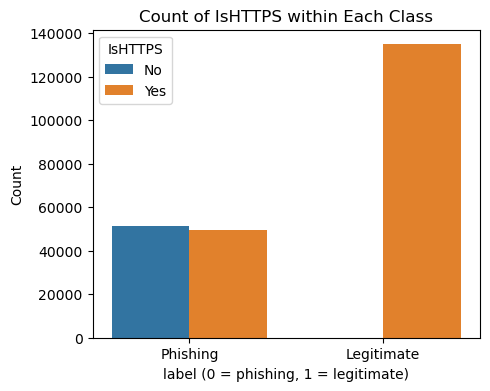

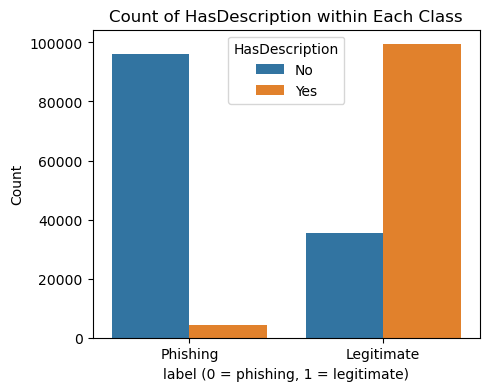

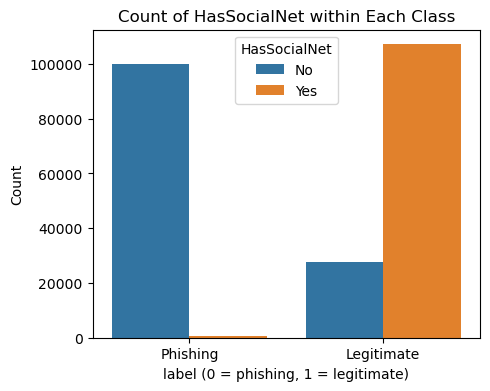

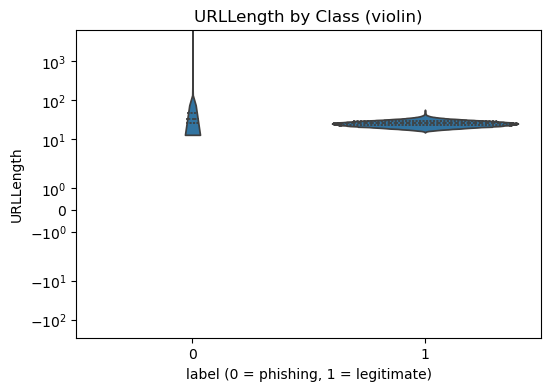

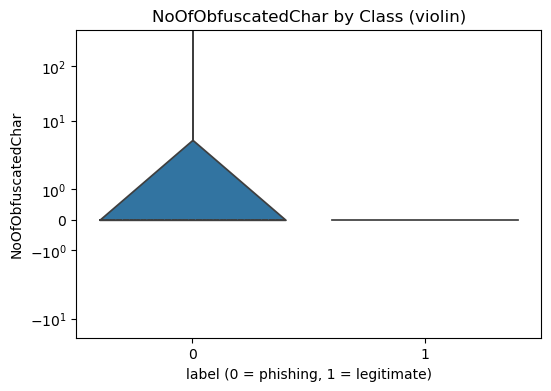

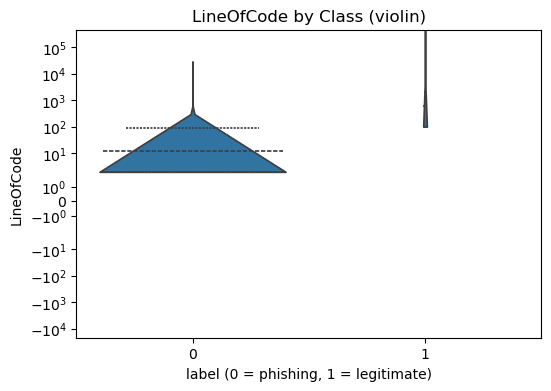

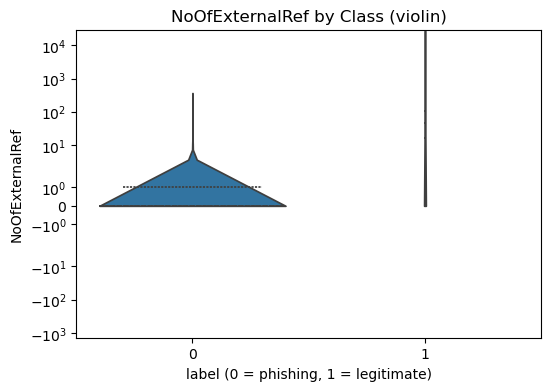

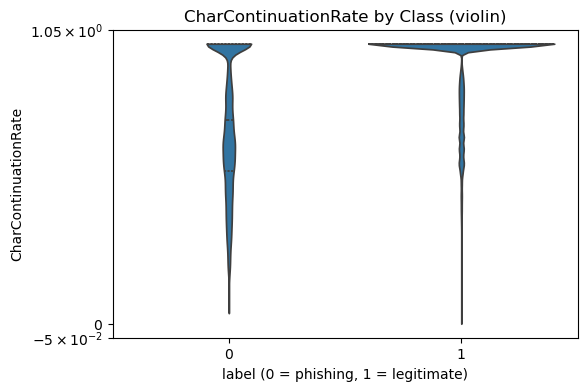

In [17]:
#Visualizations
##Binary
bin_cols = [c for c in ["IsHTTPS","HasDescription","HasSocialNet"] if c in df_dedup.columns]

for col in bin_cols:
    counts = (
        df_dedup
        .groupby(["label", col])
        .size()                  # raw counts
        .rename("count")
        .reset_index()
    )
    counts["label"] = counts["label"].map({0: "Phishing", 1: "Legitimate"})
    counts[col] = counts[col].map({0: "No", 1: "Yes"})
    
    plt.figure(figsize=(5, 4))
    sns.barplot(
        data=counts,
        x="label",
        y="count",
        hue=col
    )
    plt.title(f"Count of {col} within Each Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel("Count")
    plt.show()

##Numerical 
num_cols = [
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        data=df_dedup,
        x="label",
        y=col,
        cut=0,
        inner="quartile"
    )
    plt.title(f"{col} by Class (violin)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel(col)
    plt.yscale("symlog")  # again, optional
    plt.show()

Interpretation of Binary and Continuous Feature Visualizations

IsHTTPS

Legitimate websites almost universally use HTTPS, while phishing URLs are split between secure and non-secure connections. This highlights inconsistent security adoption among phishing sites and makes HTTPS usage a strong discriminative indicator.

HasDescription

Phishing websites overwhelmingly lack HTML page descriptions, whereas legitimate sites commonly include them. The sharp contrast suggests that descriptive metadata is a strong signal of legitimacy.

HasSocialNet

Links to social media are largely absent from phishing websites but are prevalent among legitimate sites. This reflects the broader online presence typical of legitimate organizations and the isolated nature of phishing pages.

URLLength

Legitimate URLs are tightly concentrated within a narrow length range, indicating consistent and structured URL design. Phishing URLs show a much wider spread, including extreme values, reflecting irregular and often deliberately complex URL construction.

NoOfObfuscatedChar

Legitimate websites almost exclusively exhibit zero obfuscated characters. Phishing URLs display a broader distribution with occasional extreme values, consistent with intentional obfuscation used to conceal malicious intent.

LineOfCode

Legitimate websites generally contain substantially more lines of HTML code, with a wide upper tail reflecting complex and content-rich pages. Phishing pages are heavily concentrated at low code counts, indicating minimalistic page structures.

NoOfExternalRef

Legitimate websites tend to include a large number of external references, while phishing pages typically have few or none. The strong separation reinforces the structural simplicity of phishing pages relative to legitimate sites.

CharContinuationRate

Legitimate URLs are tightly clustered near a continuation rate of one, indicating stable and repetitive character patterns. Phishing URLs show a broader spread across the range, suggesting more irregular and less structured character sequences.

## Feature relationships and correlation analysis

This section examines relationships among numerical features and their associations with the target label using correlation analysis and pairwise visualizations. Correlation heatmaps, ranked correlation scores, and targeted scatter, box, and strip plots are used to identify strongly related features, assess redundancy, and evaluate how feature relationships differ between phishing and legitimate URLs. These analyses help inform feature selection and modeling decisions.

Correlation structure among numeric features

This section examines linear relationships among numeric features using a correlation heatmap and ranked correlation values. The analysis highlights groups of strongly related variables and identifies potential redundancy among features. These results provide insight into feature dependency and help inform downstream feature selection and modeling decisions.

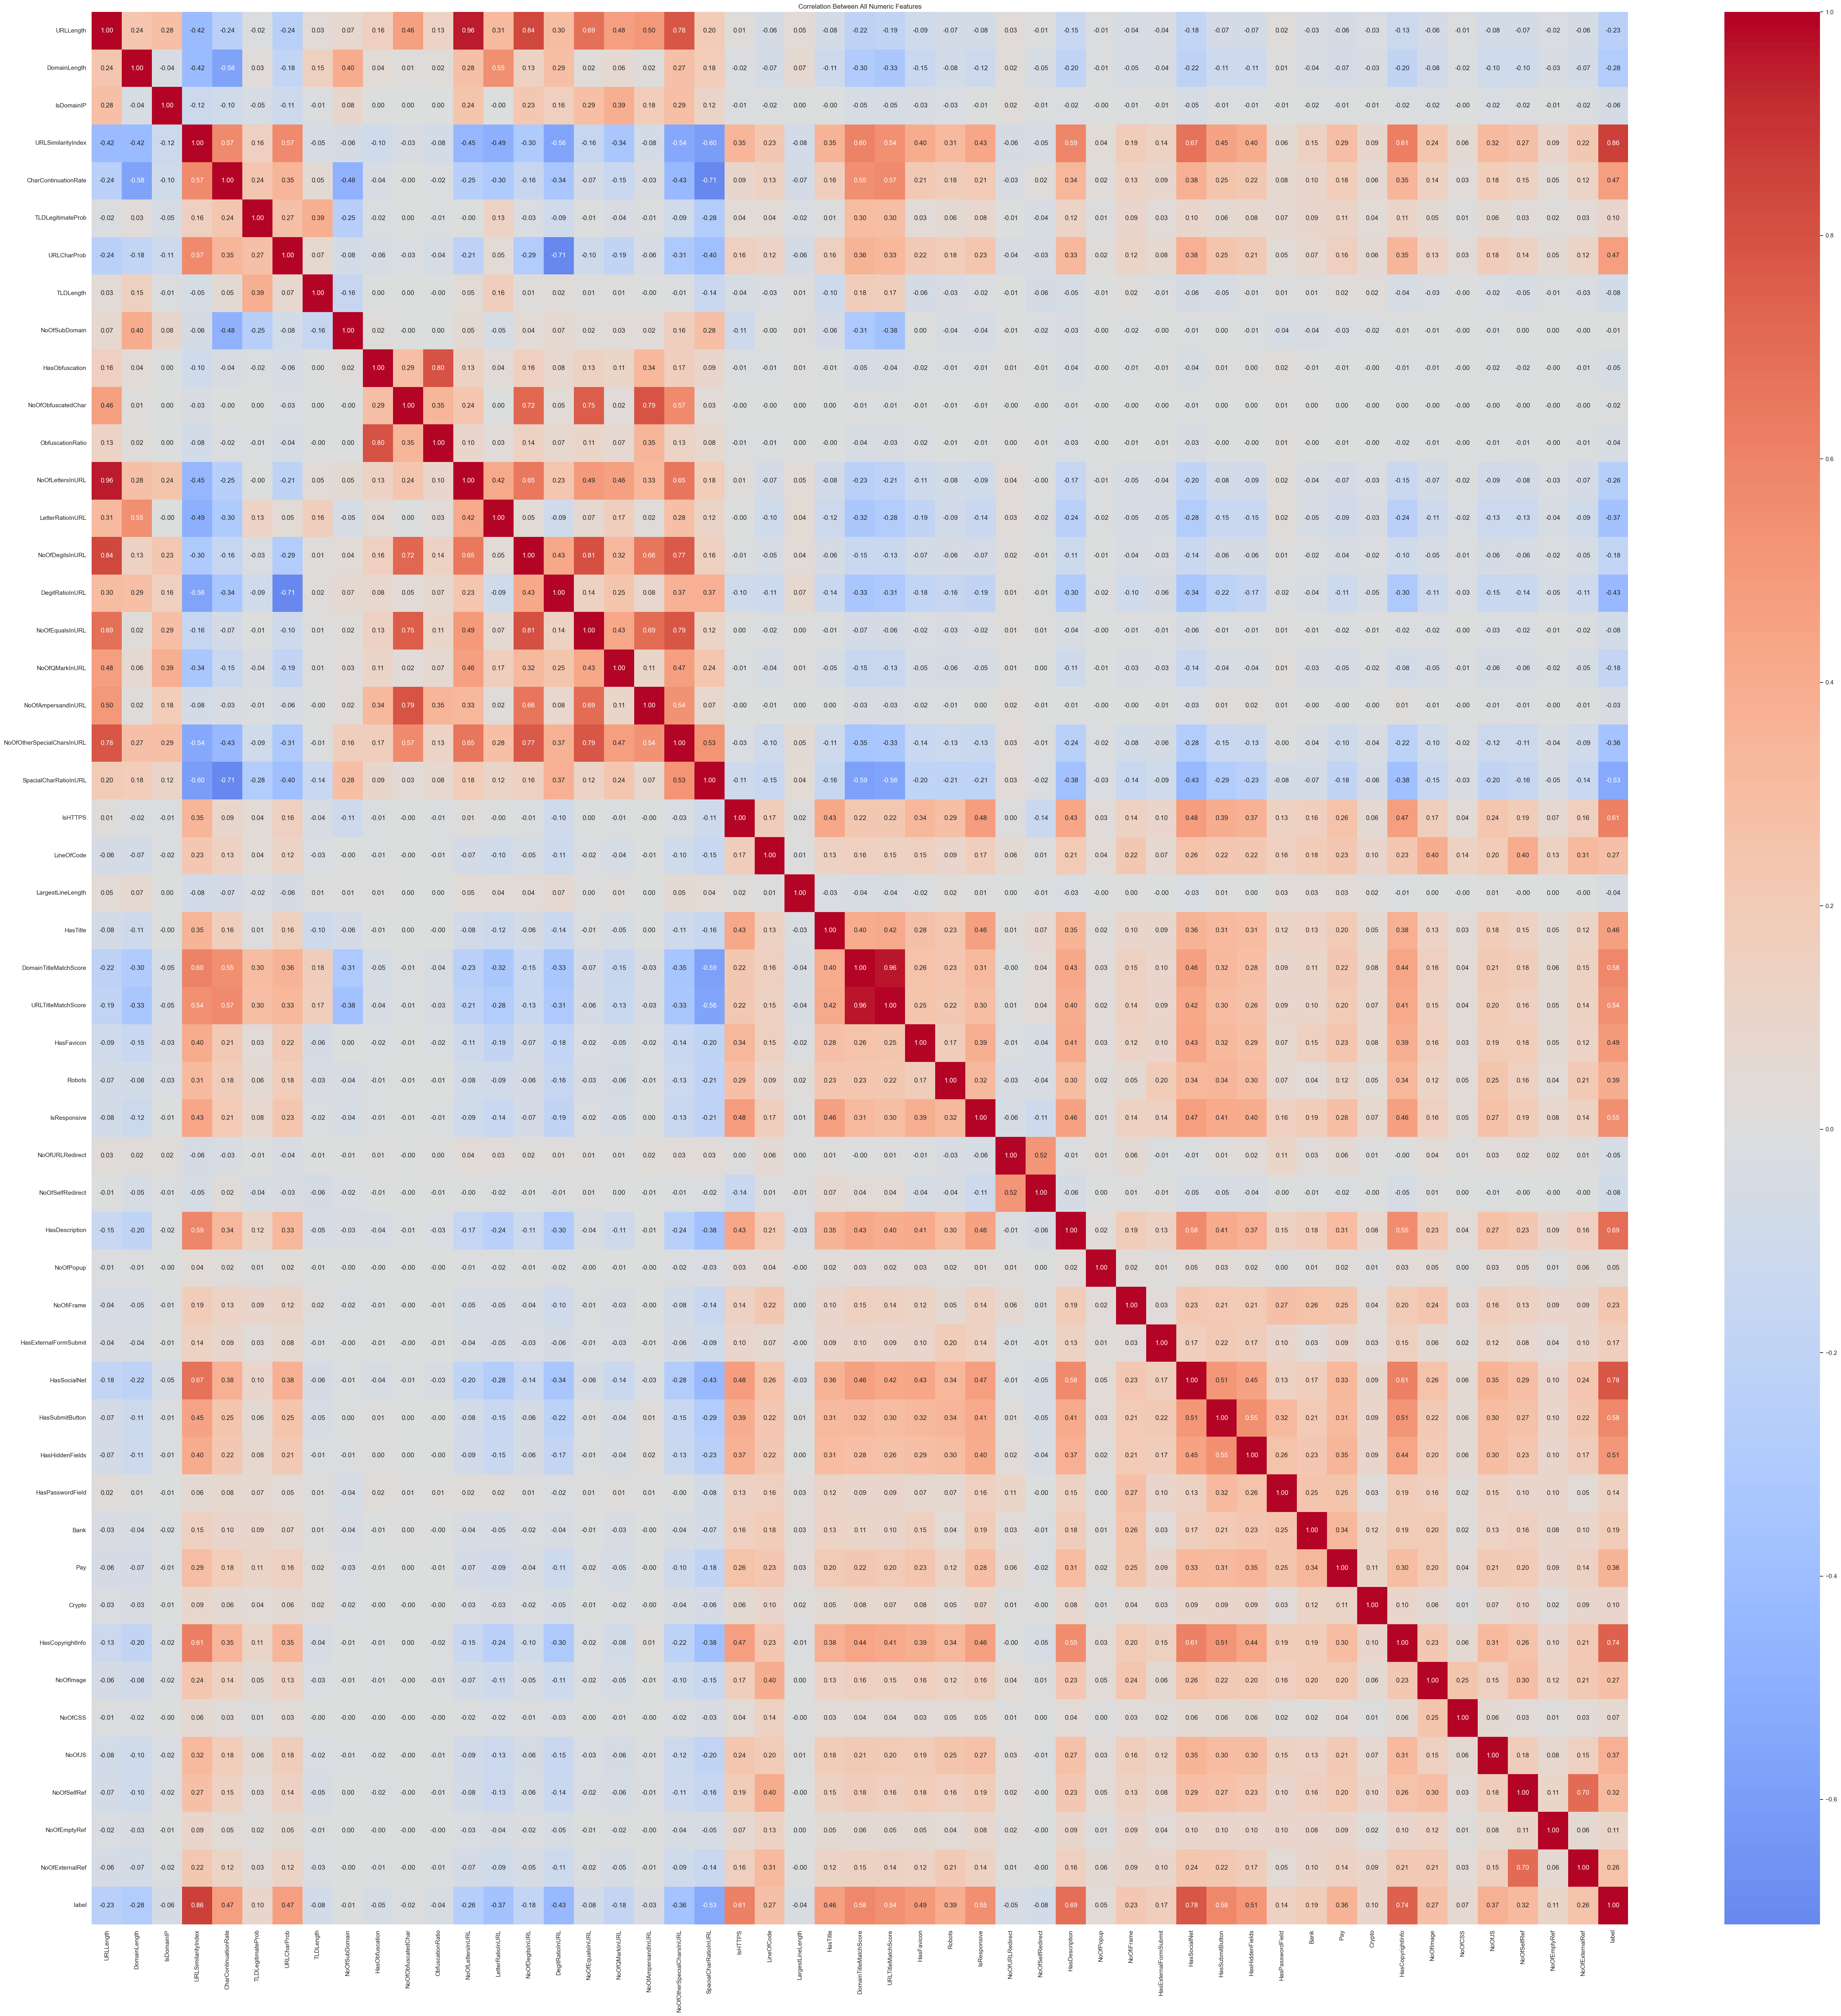

                  feature_1              feature_2      corr  abs_corr
1250  DomainTitleMatchScore     URLTitleMatchScore  0.961166  0.961166
1299     URLTitleMatchScore  DomainTitleMatchScore  0.961166  0.961166
11                URLLength       NoOfLettersInURL  0.956046  0.956046
588        NoOfLettersInURL              URLLength  0.956046  0.956046
13                URLLength        NoOfDegitsInURL  0.835966  0.835966
686         NoOfDegitsInURL              URLLength  0.835966  0.835966
701         NoOfDegitsInURL        NoOfEqualsInURL  0.806379  0.806379
798         NoOfEqualsInURL        NoOfDegitsInURL  0.806379  0.806379
451          HasObfuscation       ObfuscationRatio  0.798787  0.798787
548        ObfuscationRatio         HasObfuscation  0.798787  0.798787


In [53]:
###CorrMap
num_cols = df_dedup.select_dtypes(include="number").columns
plt.figure(figsize=(len(num_cols), len(num_cols)))
corr = df_dedup[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Between All Numeric Features")
plt.tight_layout()
plt.show()

###Collecting most correlated data
corr_with_label = (
    df_dedup.corr(numeric_only=True)["label"]
    .drop("label")
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

num_cols = df_dedup.select_dtypes(include="number").columns.drop("label")
corr = df_dedup[num_cols].corr()

corr_long = (
    corr
    .where(~np.eye(corr.shape[0], dtype=bool))   # drop diagonal
    .stack()                                     # (feature1, feature2) -> value
    .reset_index()
)
corr_long.columns = ["feature_1", "feature_2", "corr"]

corr_long["abs_corr"] = corr_long["corr"].abs()
corr_sorted = corr_long.sort_values("abs_corr", ascending=False)

###Largest Correlation with Label
top_n = 10
top_corr = corr_sorted.head(top_n)
print(top_corr)

The strongest correlations occur between closely related feature pairs, such as title-matching scores, URL length and character counts, and obfuscation measures. These high correlations indicate substantial feature redundancy and potential multicollinearity.

Feature associations with the target label

This section evaluates the strength and direction of associations between individual features and the target label. Correlation rankings and visualizations highlight features with the strongest relationships to phishing behavior, while scatter and bar plots provide additional context for how these features separate phishing and legitimate URLs. These results help identify high-signal predictors for downstream modeling.

URLSimilarityIndex       0.860342
HasSocialNet             0.783882
HasCopyrightInfo         0.743197
HasDescription           0.690011
IsHTTPS                  0.610253
DomainTitleMatchScore    0.584204
HasSubmitButton          0.578816
IsResponsive             0.548977
URLTitleMatchScore       0.538844
SpacialCharRatioInURL   -0.533003
Name: label, dtype: float64


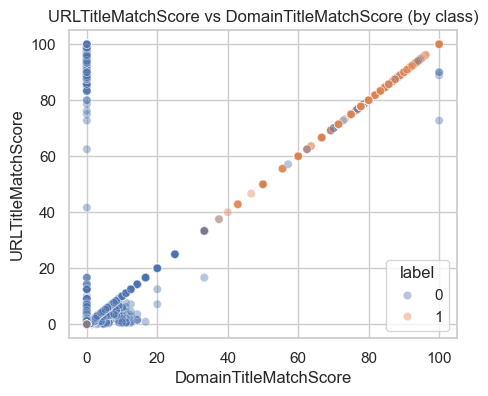

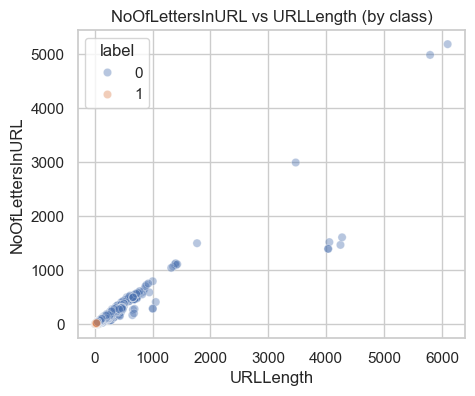

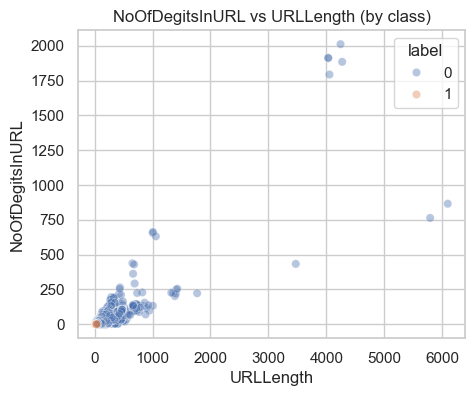

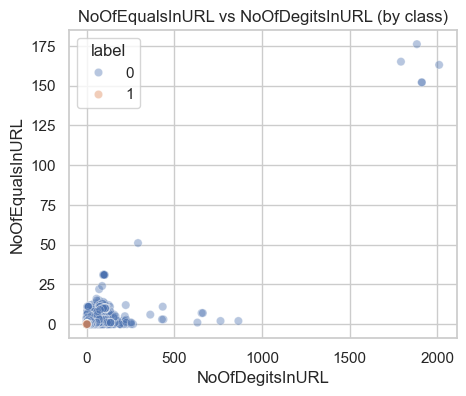

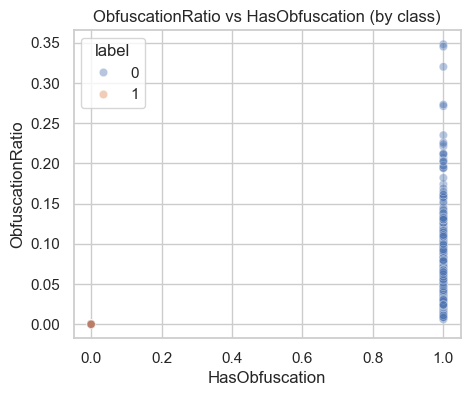

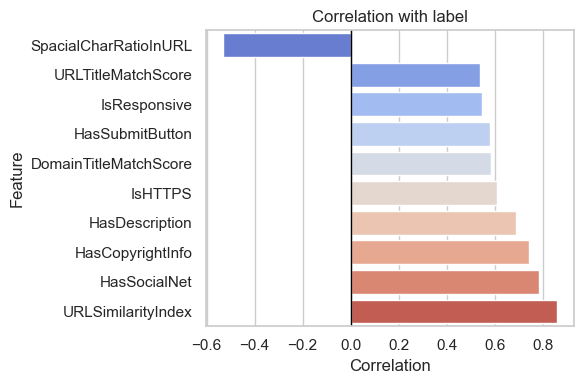

In [57]:
# Correlation of numeric features with label
corr_with_label = (
    df_dedup.corr(numeric_only=True)["label"]
    .drop("label")
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

print(corr_with_label.head(10))

#Scatter plots with Strongest Correlation
pairs = [
    ("DomainTitleMatchScore", "URLTitleMatchScore"),
    ("URLLength", "NoOfLettersInURL"),
    ("URLLength", "NoOfDegitsInURL"),
    ("NoOfDegitsInURL", "NoOfEqualsInURL"),
    ("HasObfuscation", "ObfuscationRatio"),
]

for x, y in pairs:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(
        data=df_dedup,
        x=x,
        y=y,
        hue="label",
        alpha=0.4
    )
    plt.title(f"{y} vs {x} (by class)")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

#Bar Charts of Correlation with label
top_corr_with_label = [
    "URLSimilarityIndex",
    "HasSocialNet",
    "HasCopyrightInfo",
    "HasDescription",
    "IsHTTPS",
    "DomainTitleMatchScore",
    "HasSubmitButton",
    "IsResponsive",
    "URLTitleMatchScore",
    "SpacialCharRatioInURL",
]

plt.figure(figsize=(6, 4))
corr_label = (
    df_dedup[top_corr_with_label + ["label"]]
    .corr(numeric_only=True)["label"]
    .drop("label")
    .sort_values(key=lambda s: s.abs(), ascending=True)
)

sns.barplot(
    x=corr_label.values,
    y=corr_label.index,
    hue=corr_label.index,
    orient="h",
    palette="coolwarm",
    legend=False
)
plt.title("Correlation with label")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

The top correlated features show clear and interpretable relationships with URL legitimacy. Indicators such as URLSimilarityIndex, HasSocialNet, HasCopyrightInfo, HasDescription, and IsHTTPS are strongly positively associated with legitimate websites, reflecting structured content, metadata presence, and established web practices. In contrast, SpacialCharRatioInURL is negatively correlated with the label, indicating that higher proportions of special characters are more indicative of phishing behavior. Title matching scores and usability related features such as HasSubmitButton and IsResponsive show moderate positive correlations, further supporting their role as useful discriminative signals.

Feature distributions by URL class

This section uses boxplots, scatter plots, and strip plots to examine how feature distributions and relationships differ between phishing and legitimate URLs. The visualizations show that many extreme values are class-dependent rather than random noise, and that interaction-like patterns exist between structural and content-based features. These results support retaining outliers and complex feature relationships for downstream modeling.

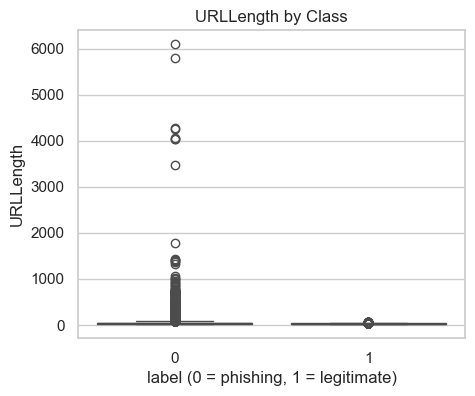

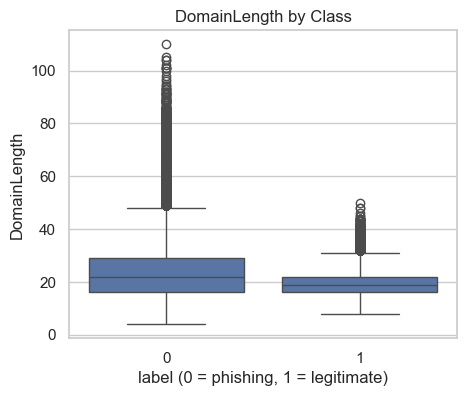

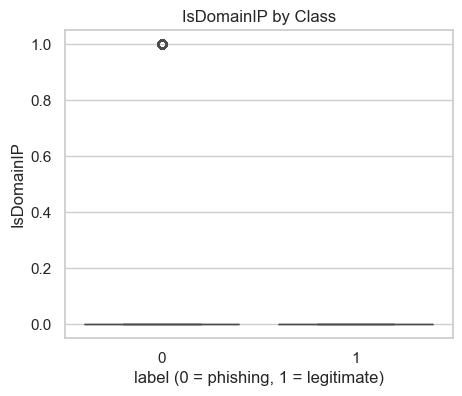

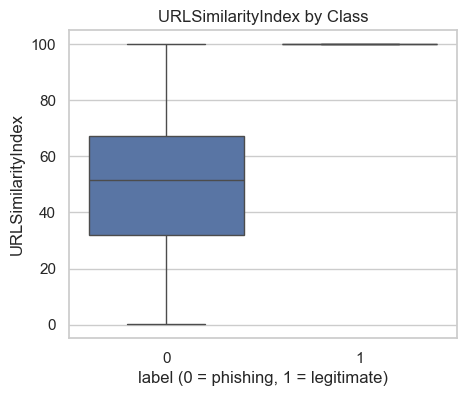

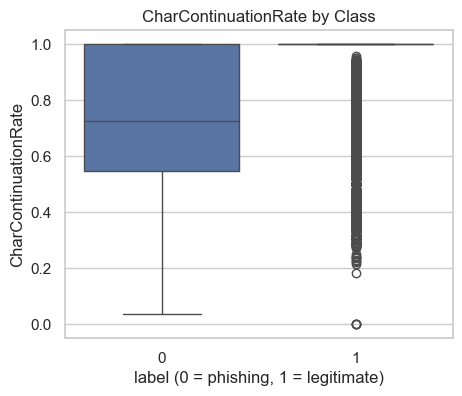

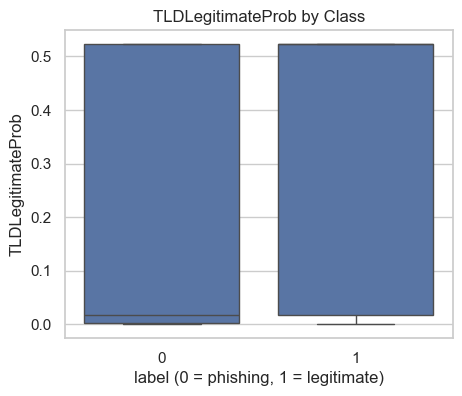

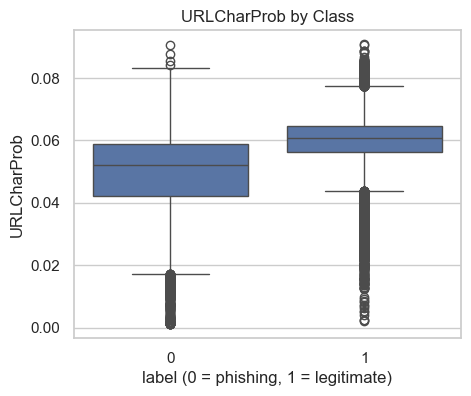

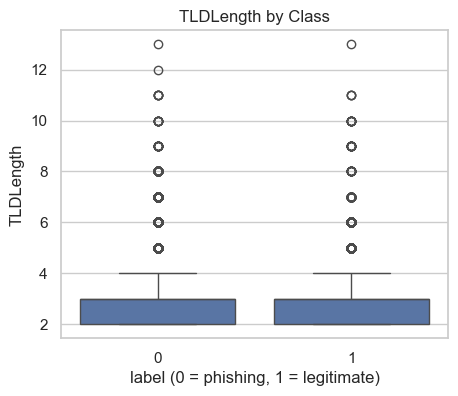

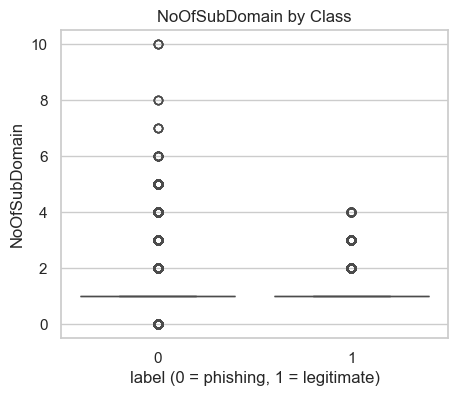

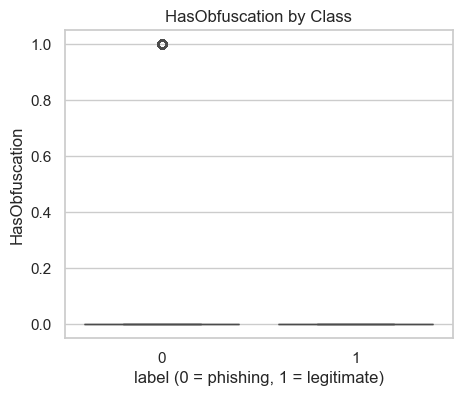

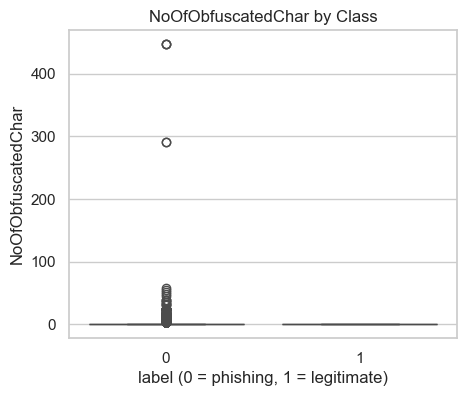

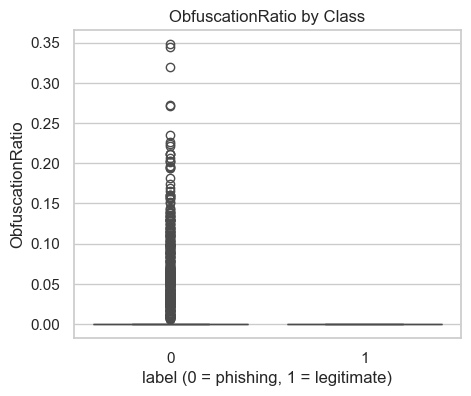

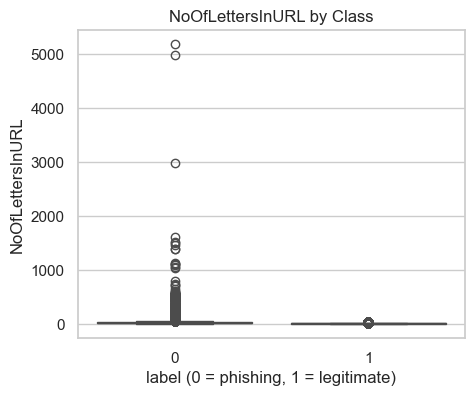

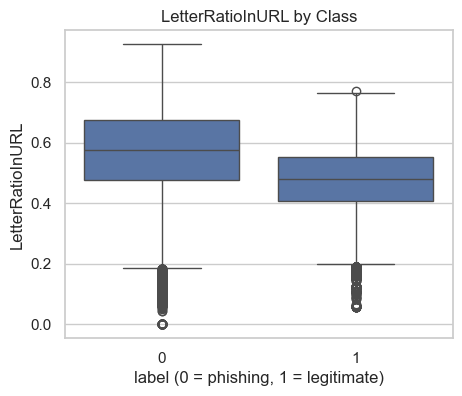

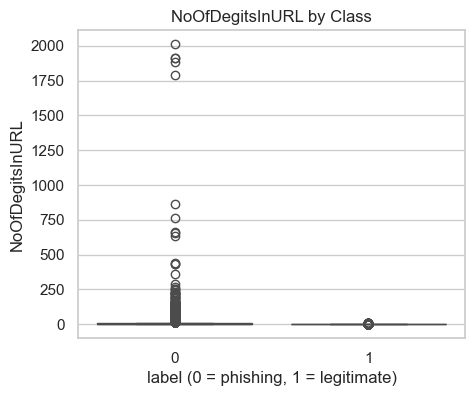

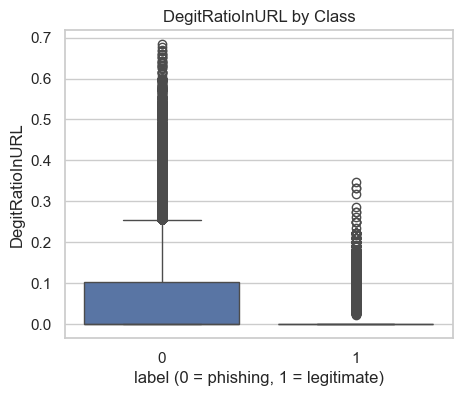

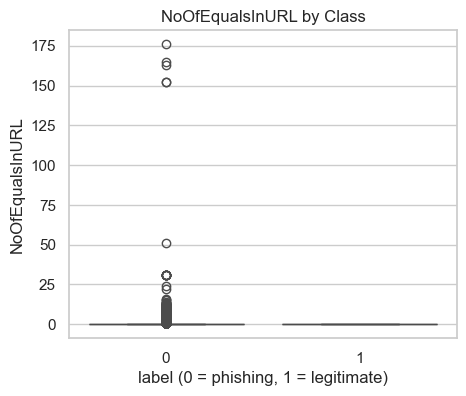

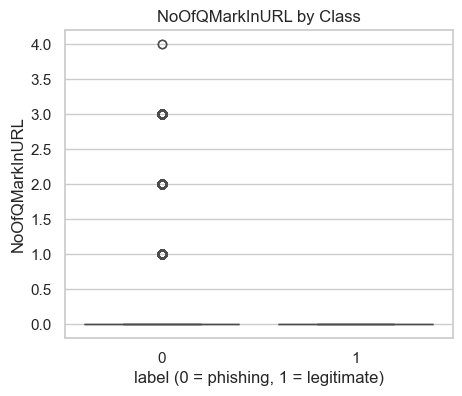

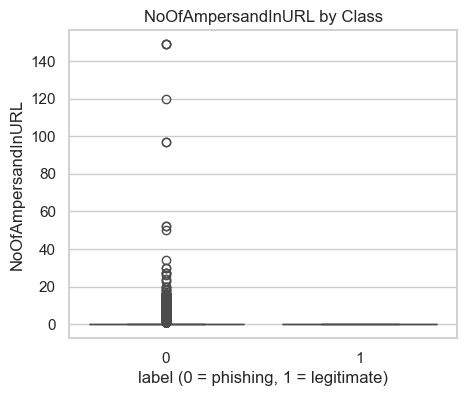

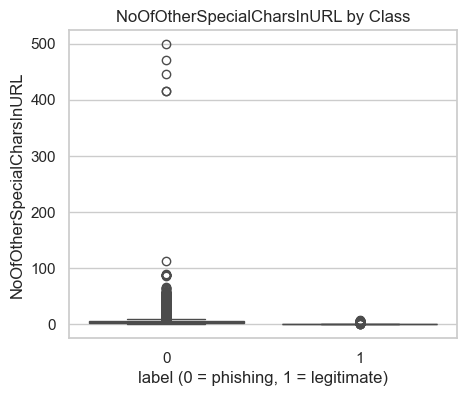

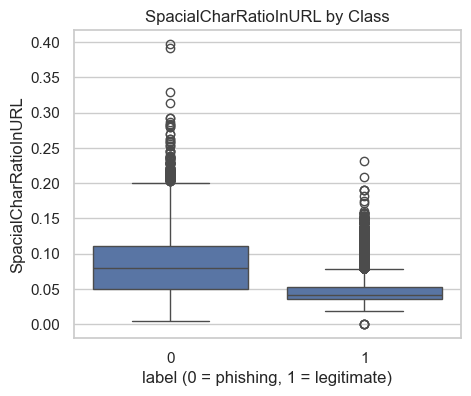

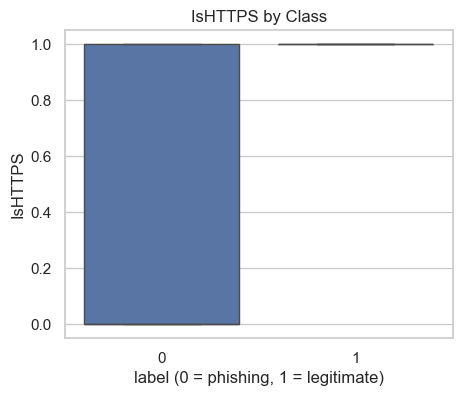

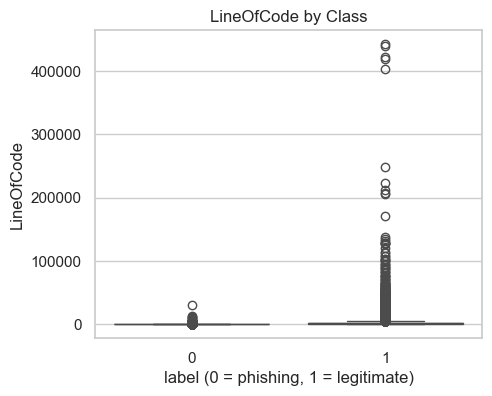

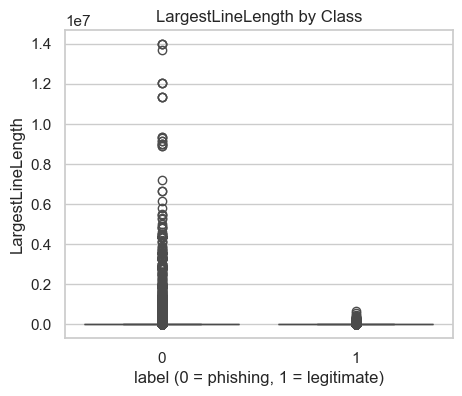

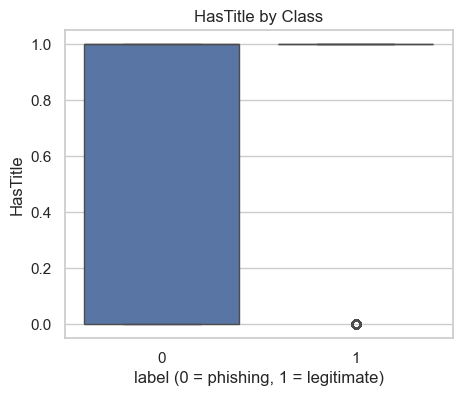

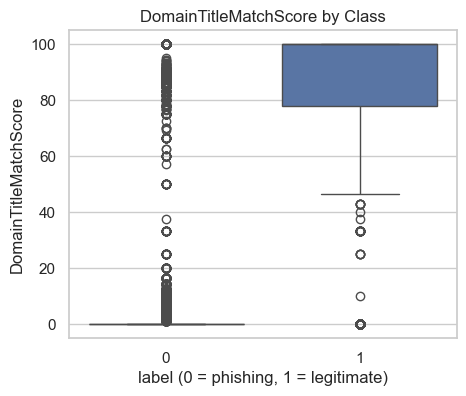

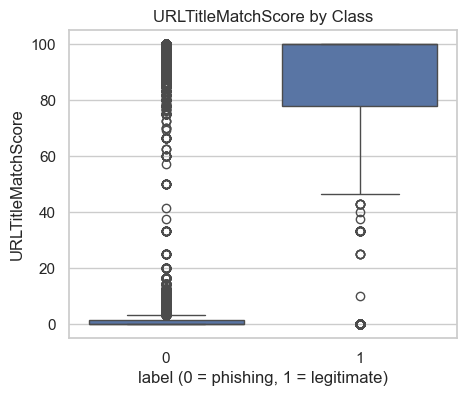

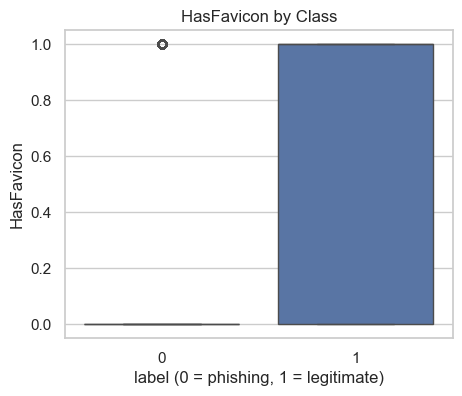

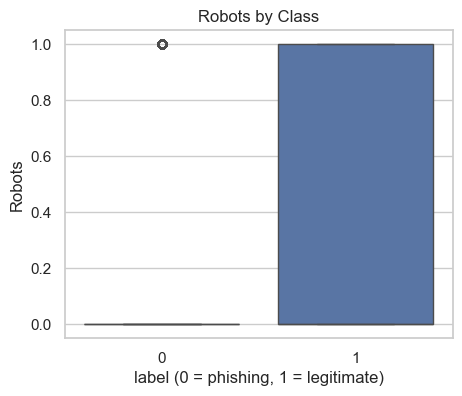

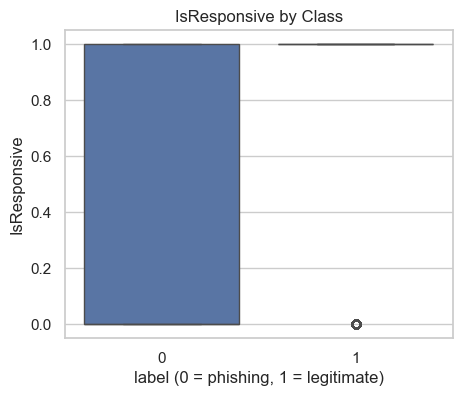

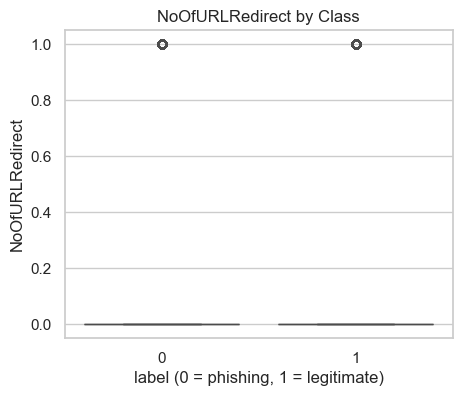

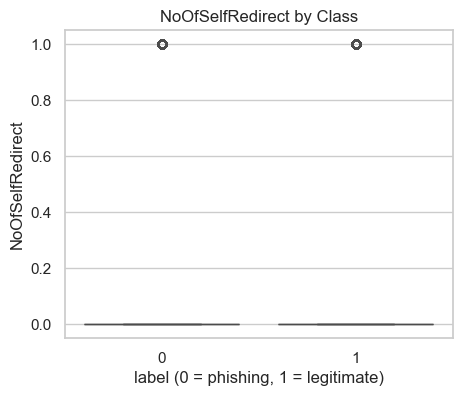

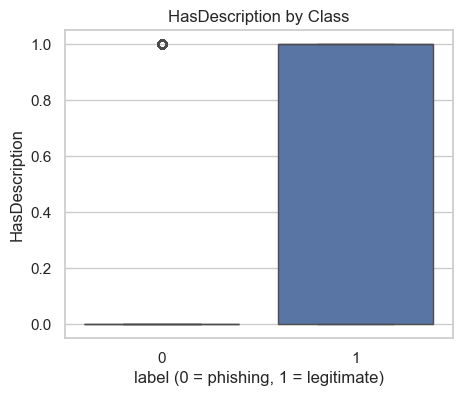

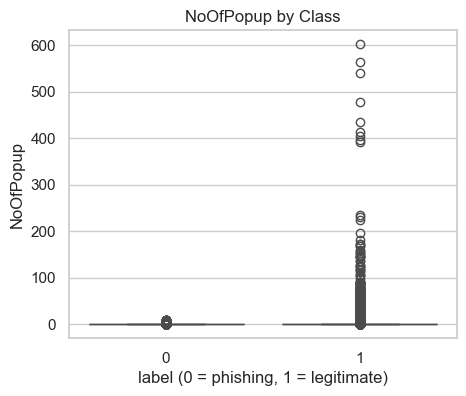

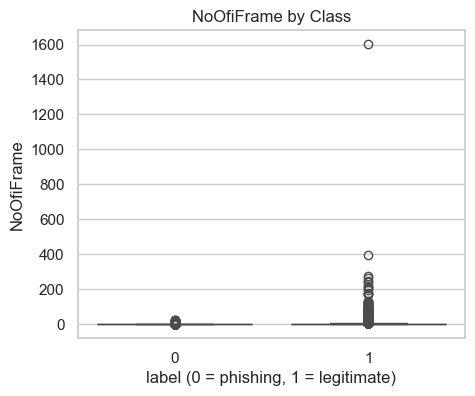

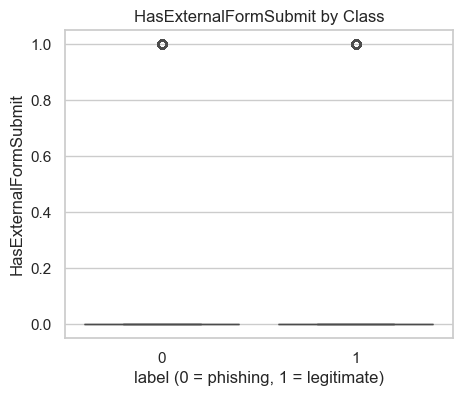

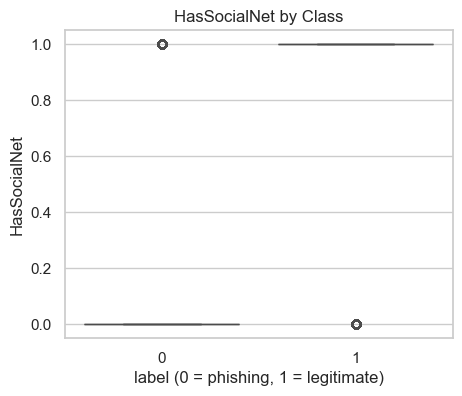

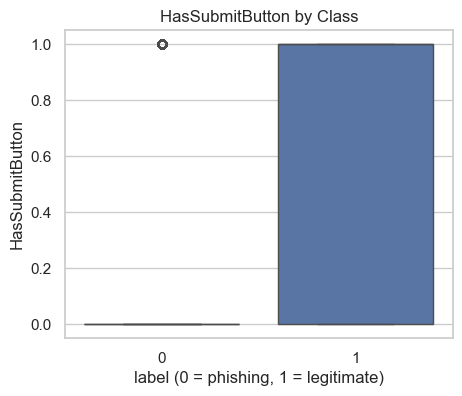

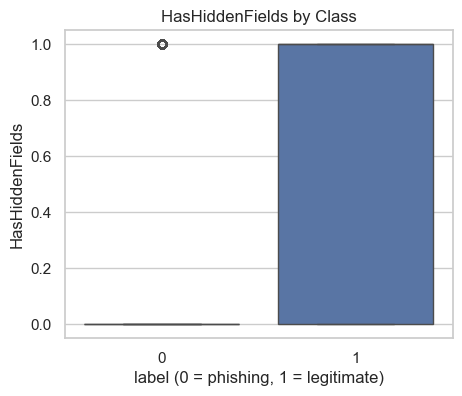

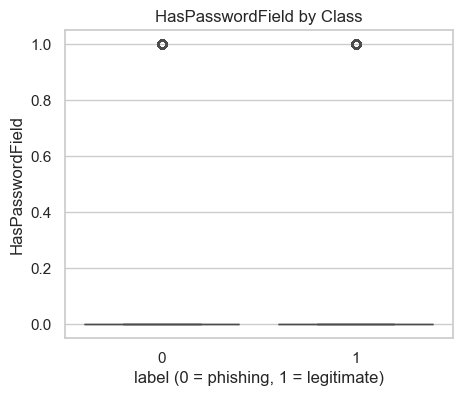

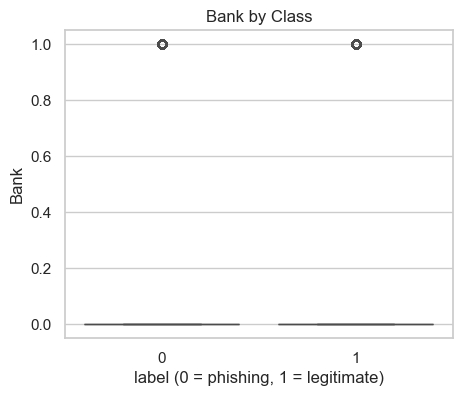

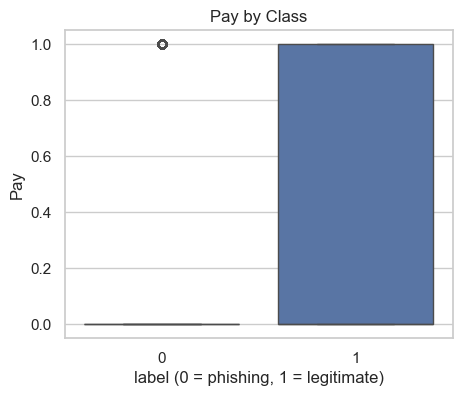

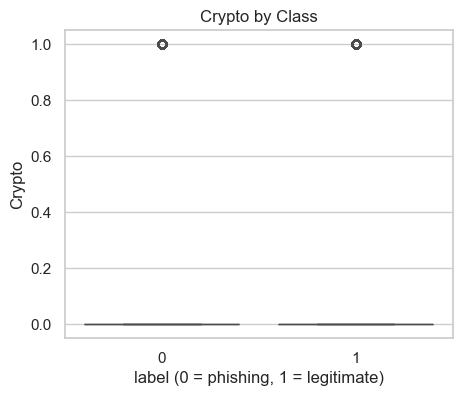

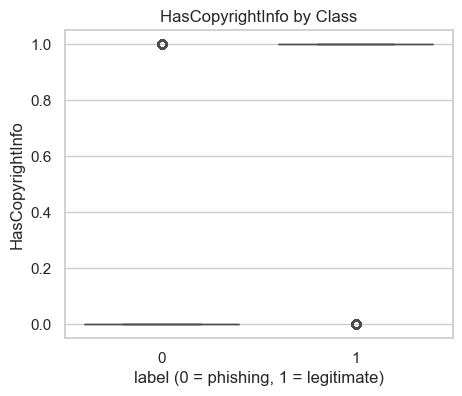

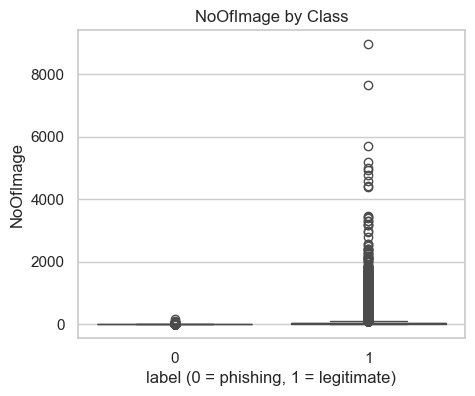

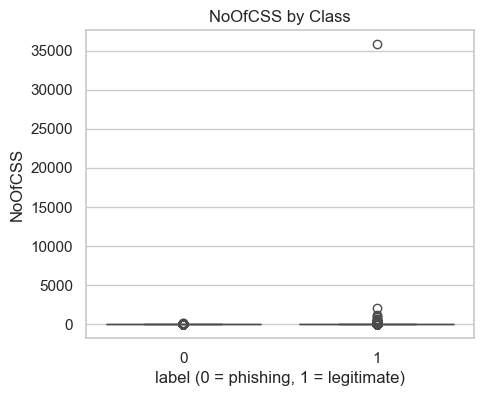

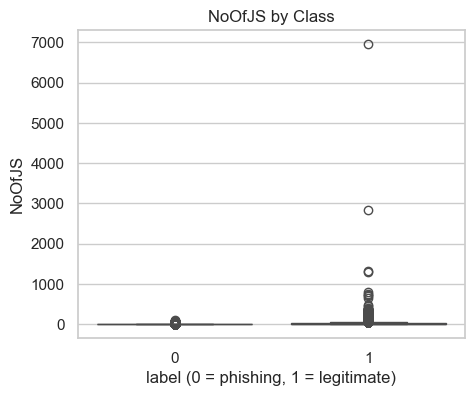

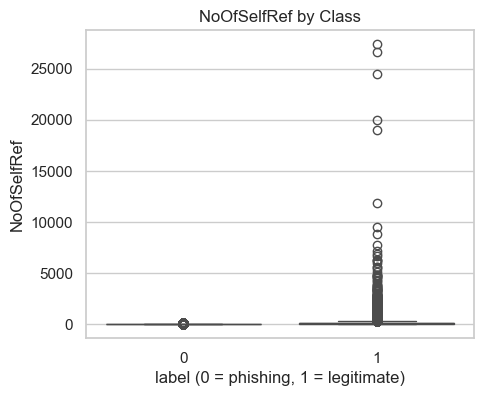

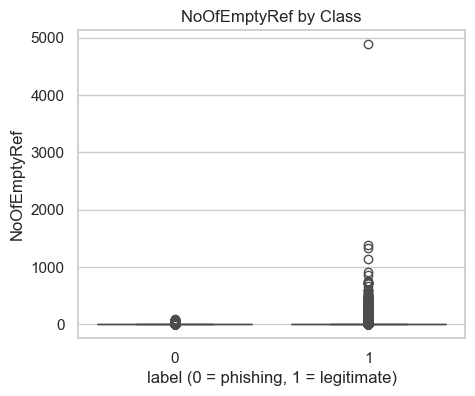

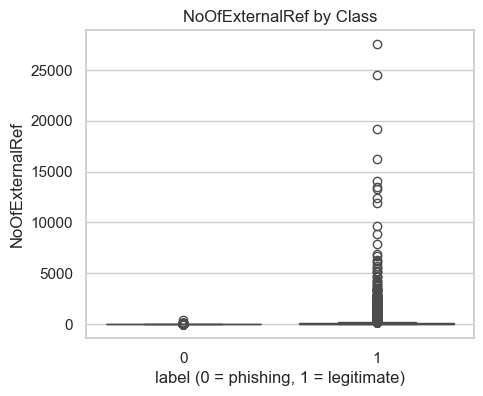

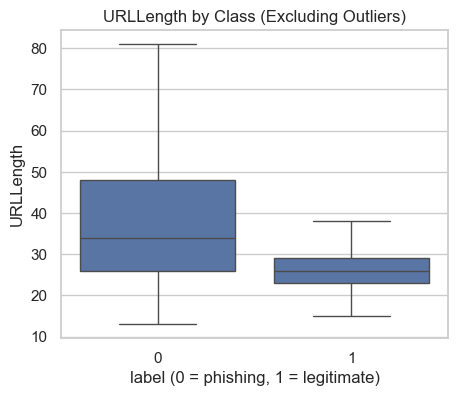

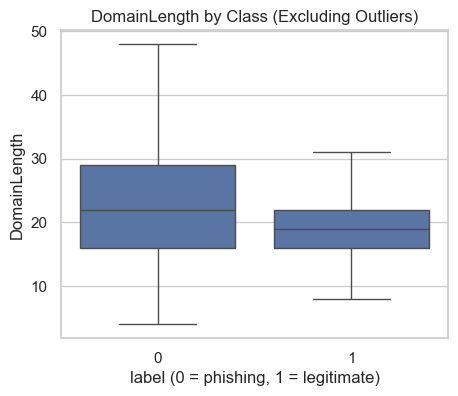

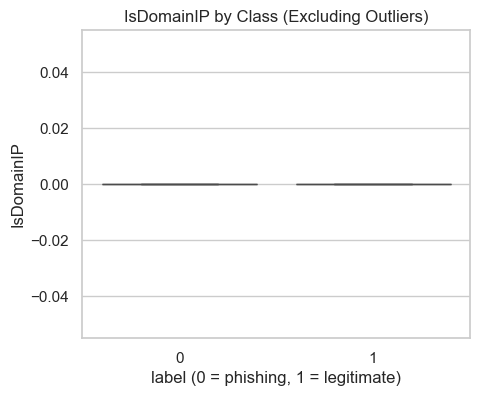

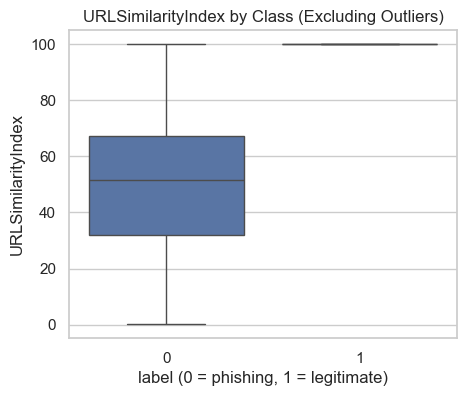

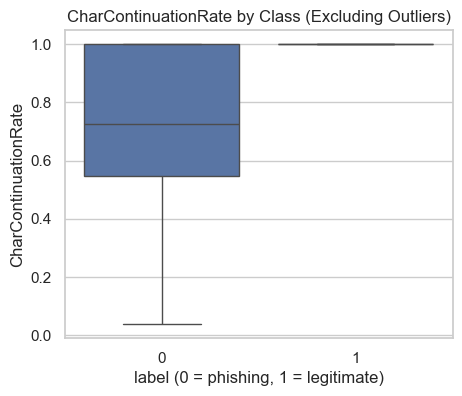

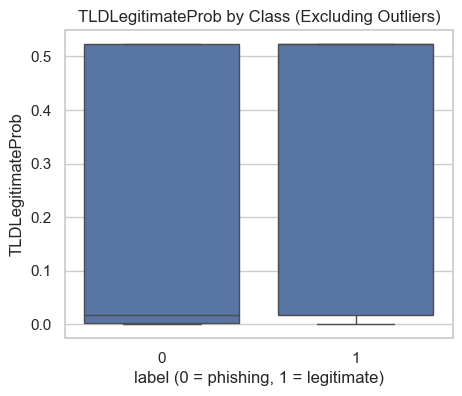

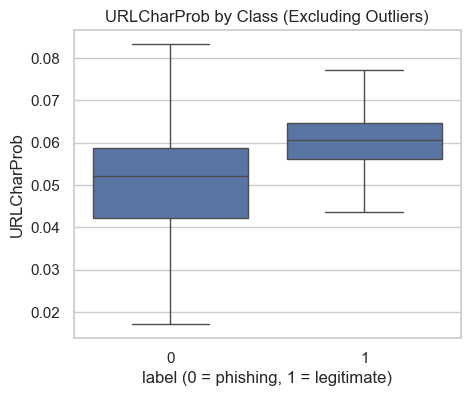

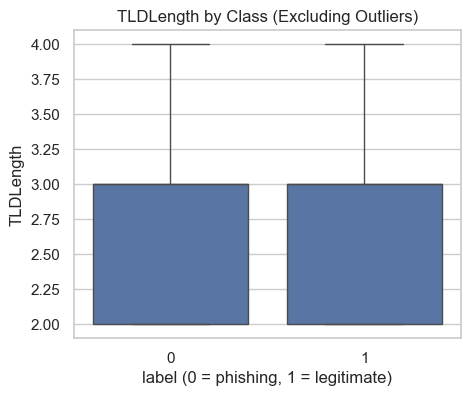

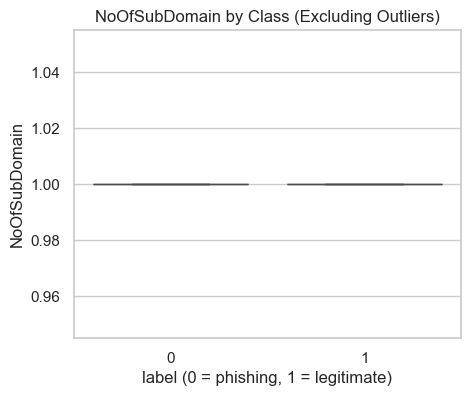

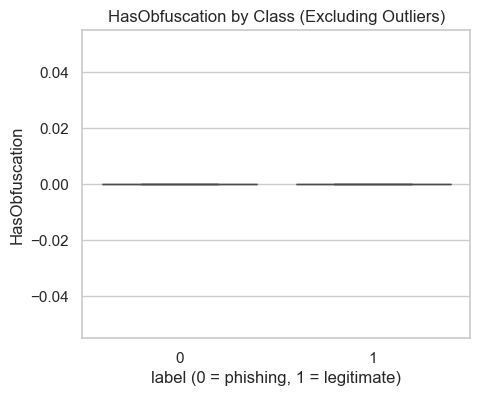

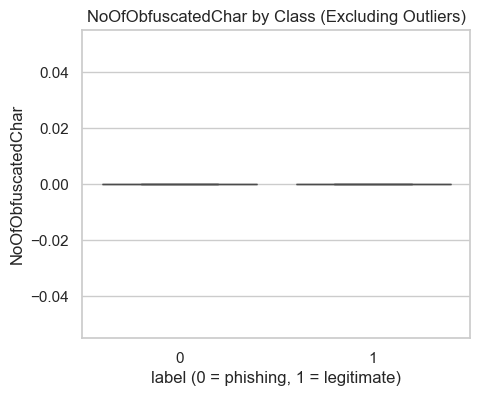

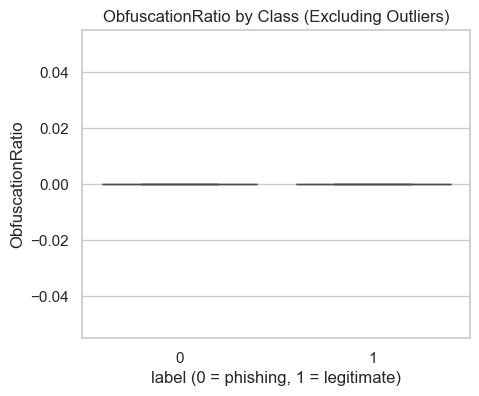

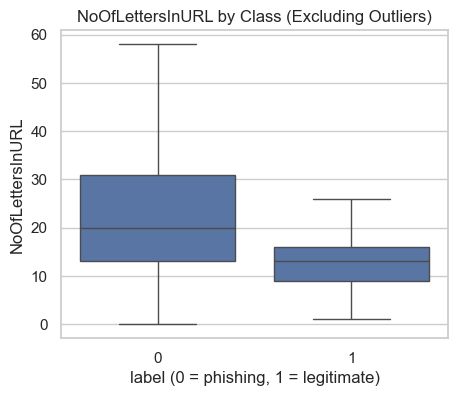

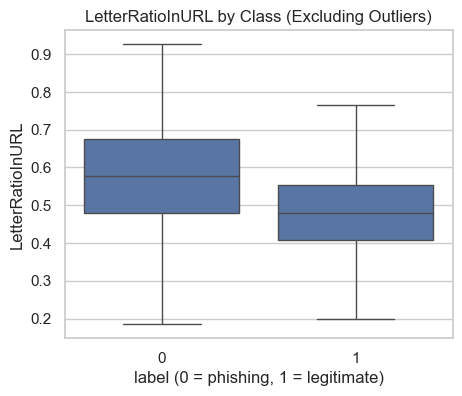

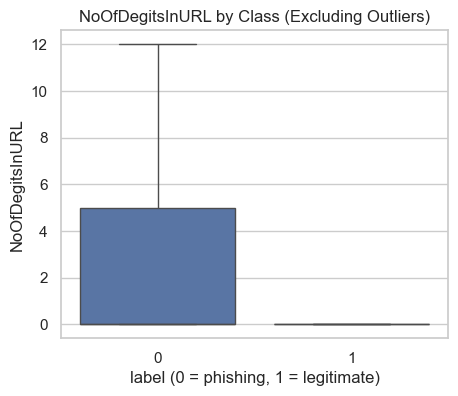

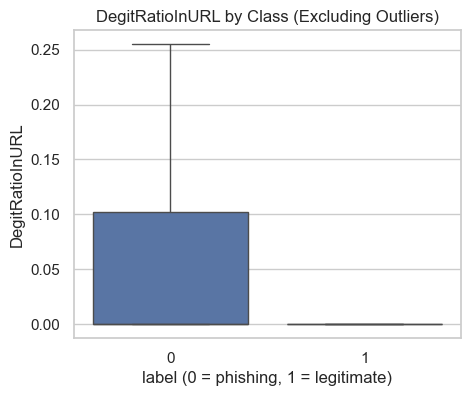

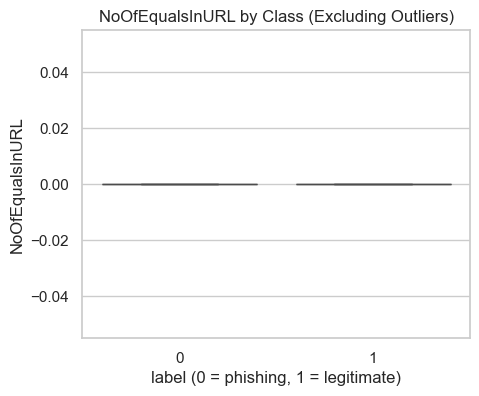

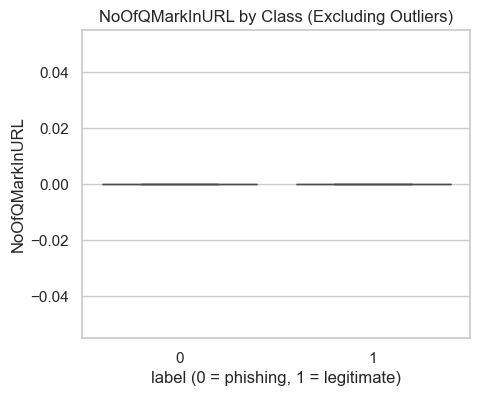

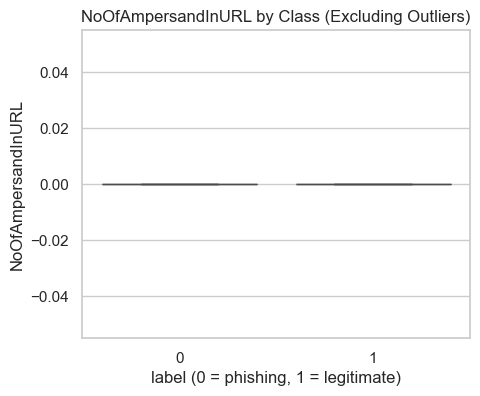

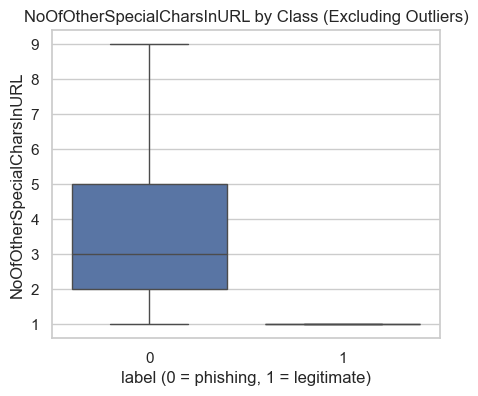

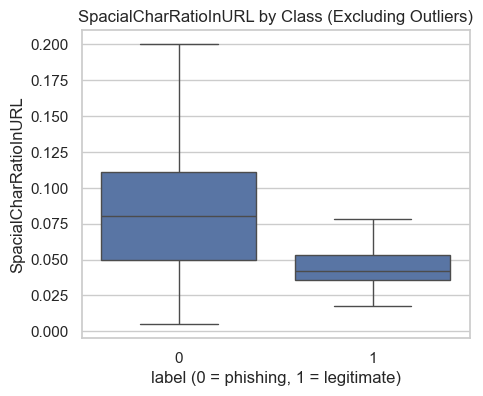

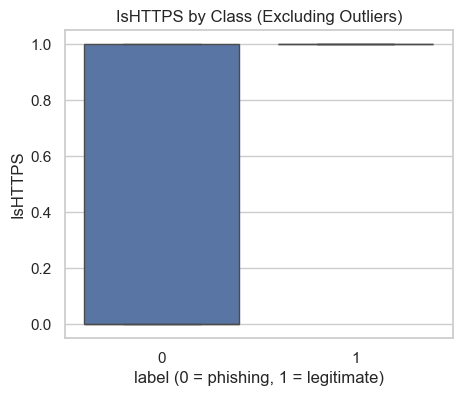

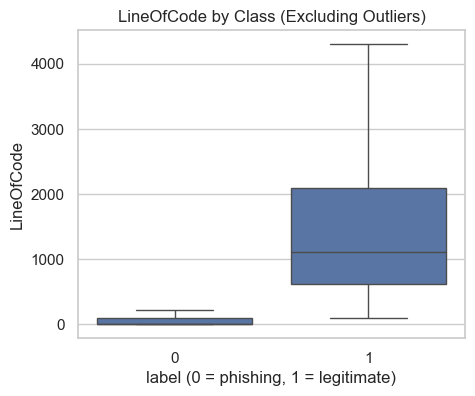

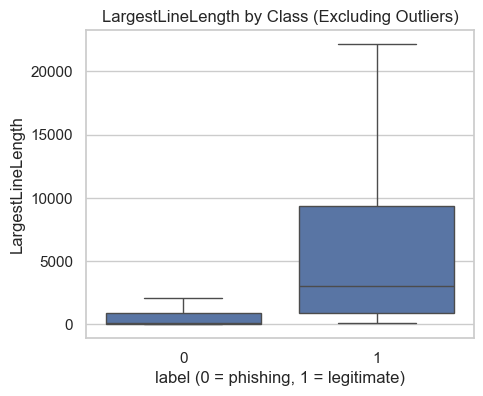

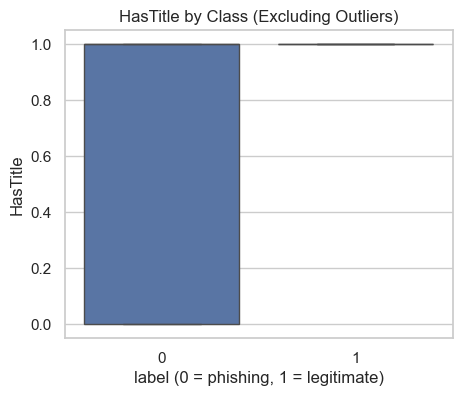

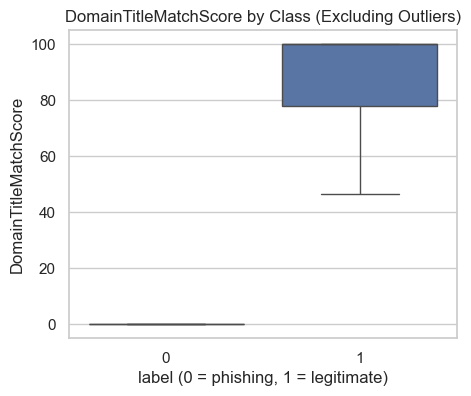

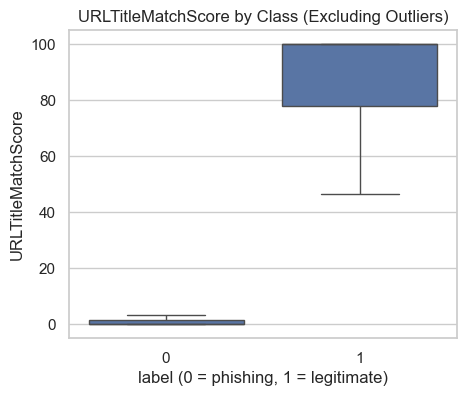

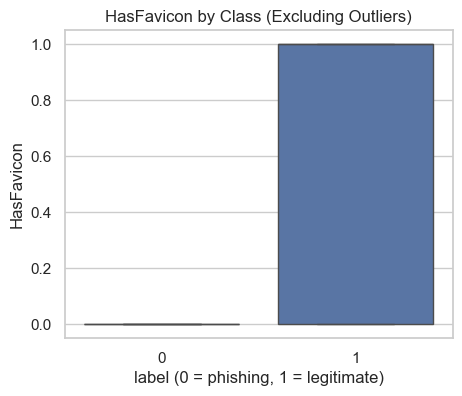

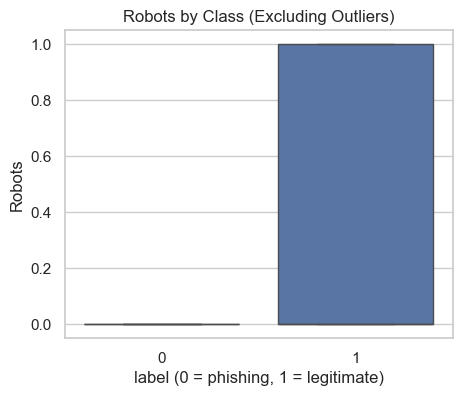

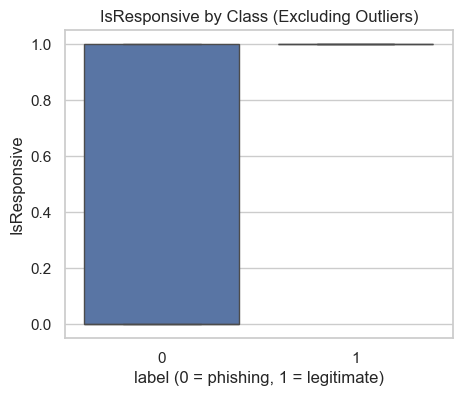

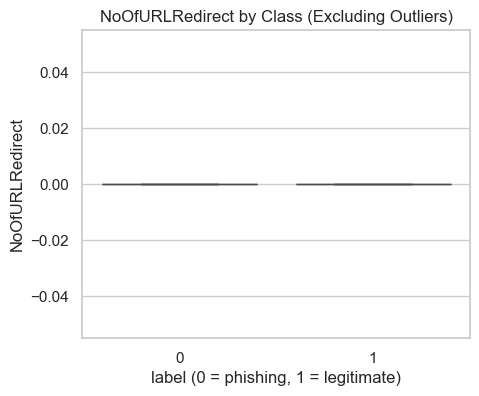

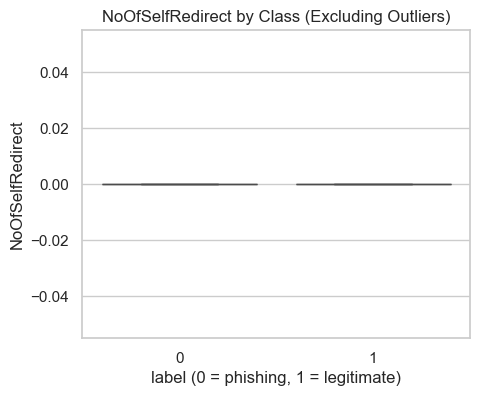

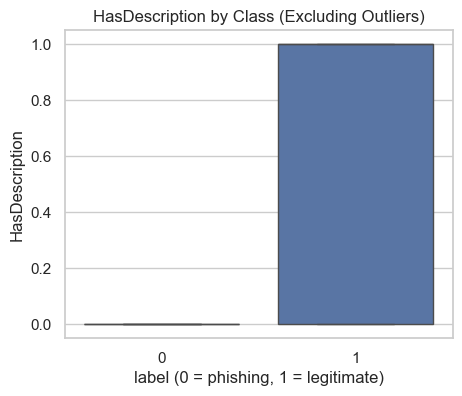

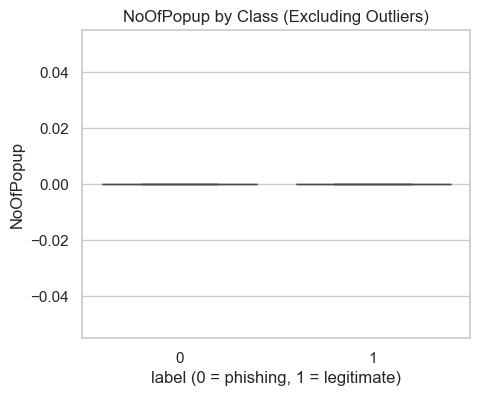

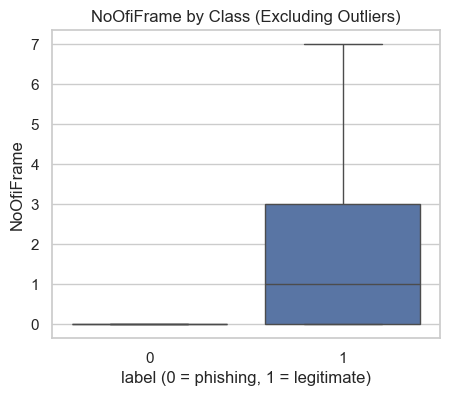

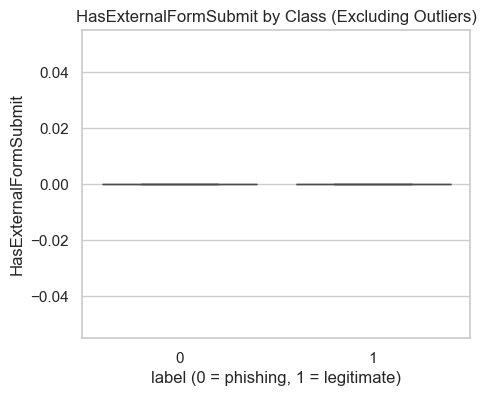

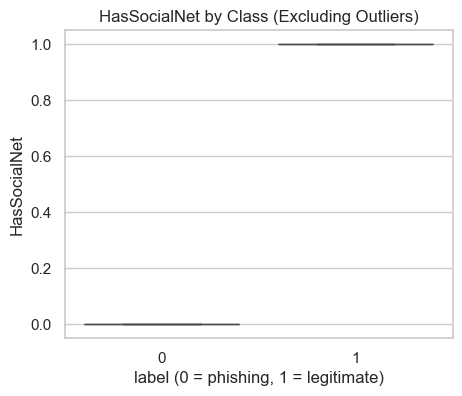

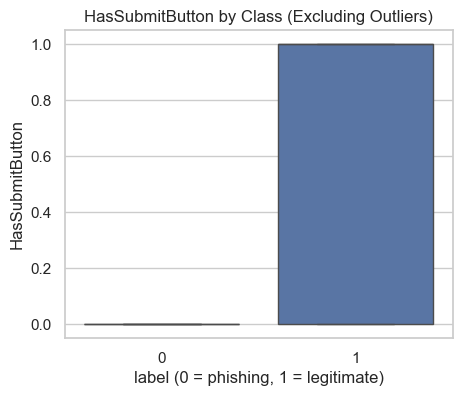

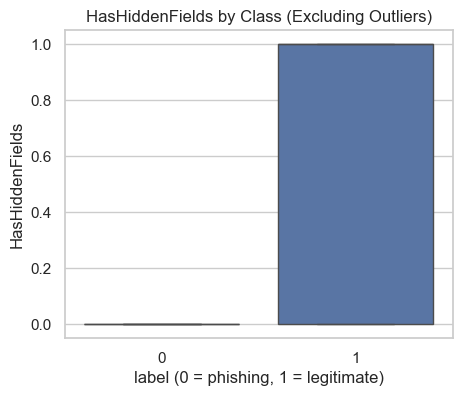

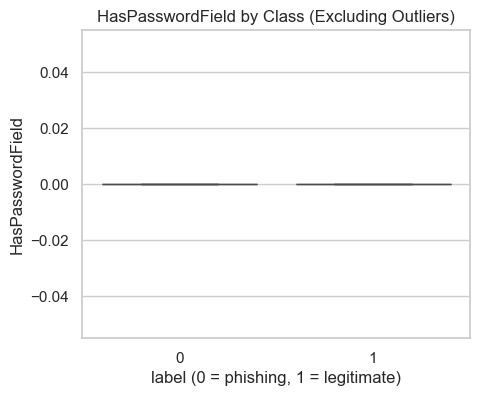

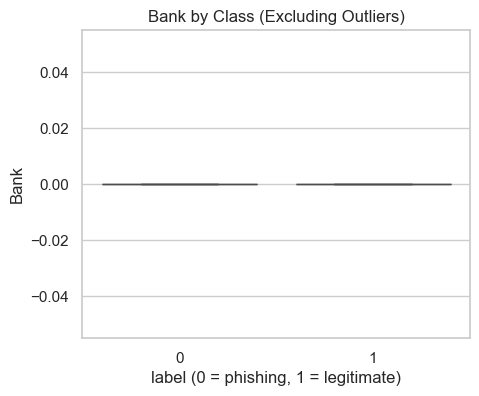

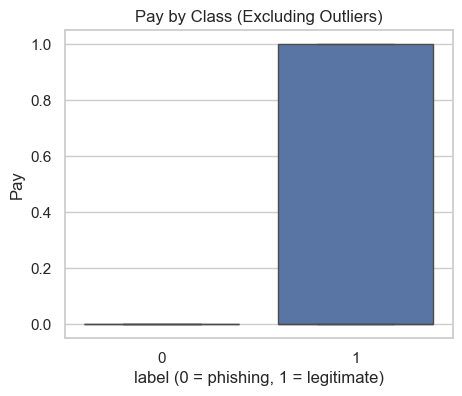

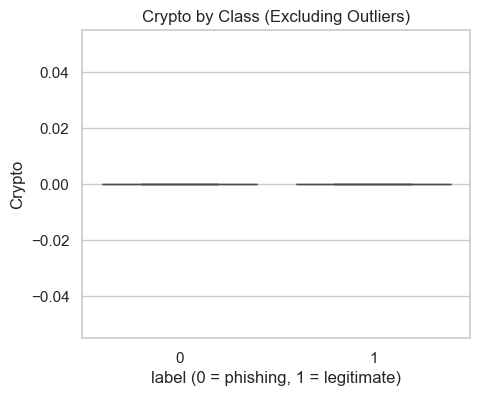

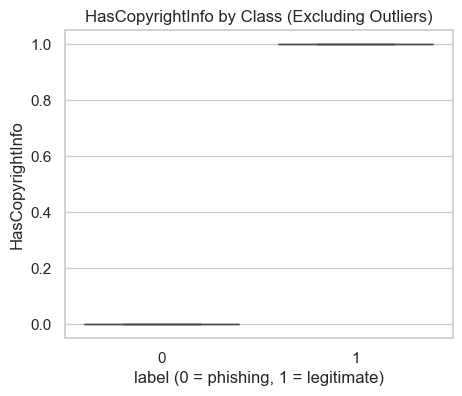

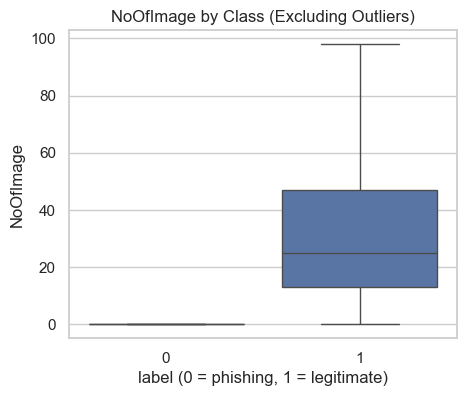

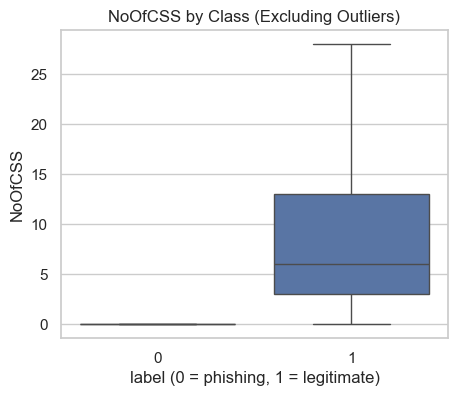

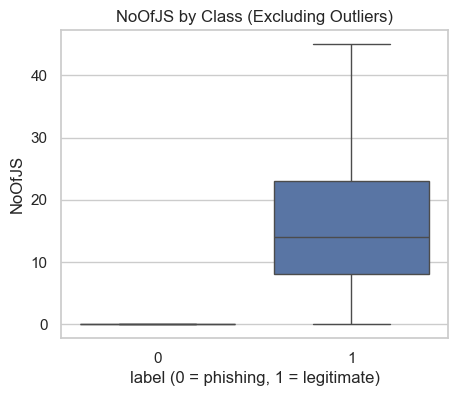

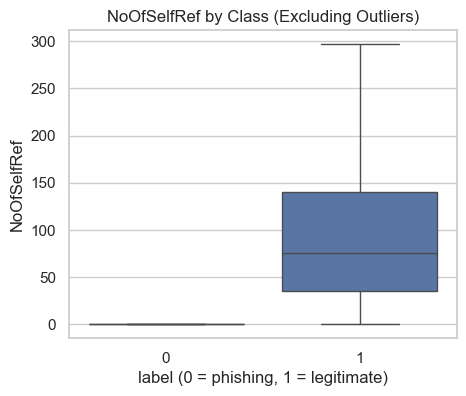

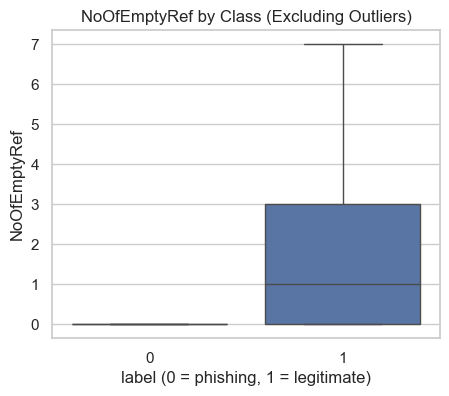

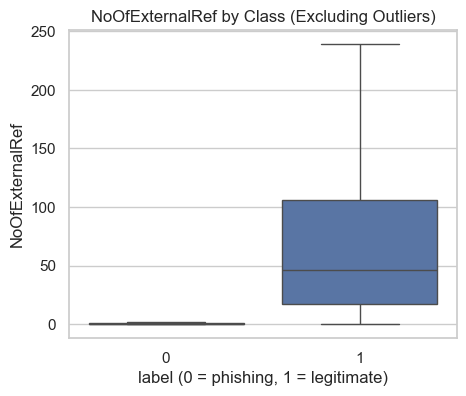

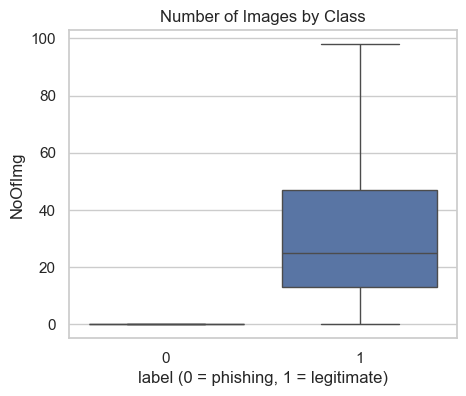

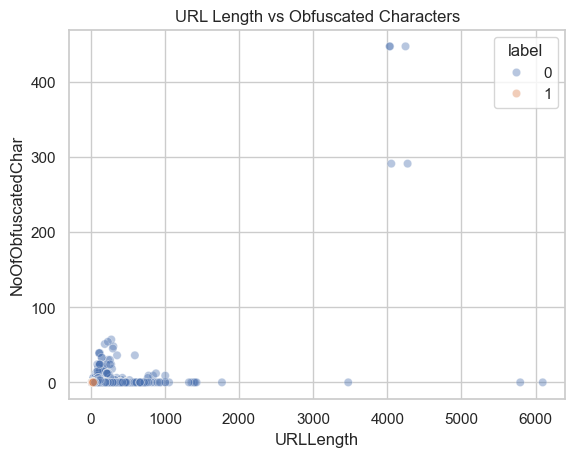

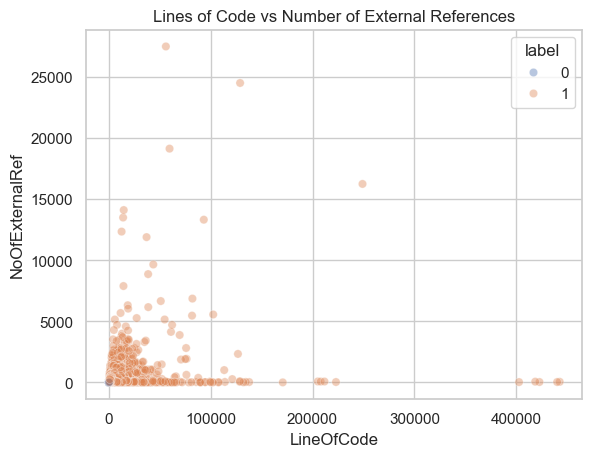

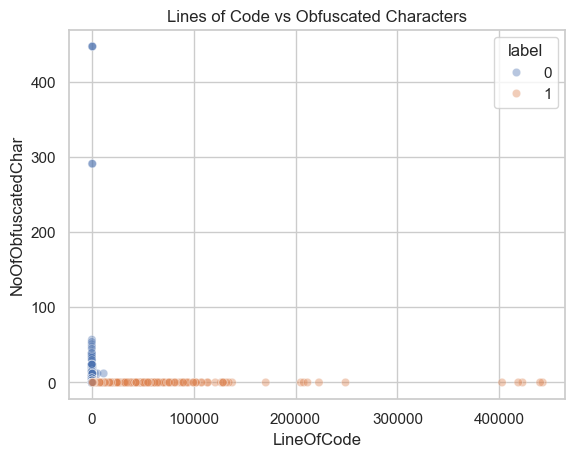

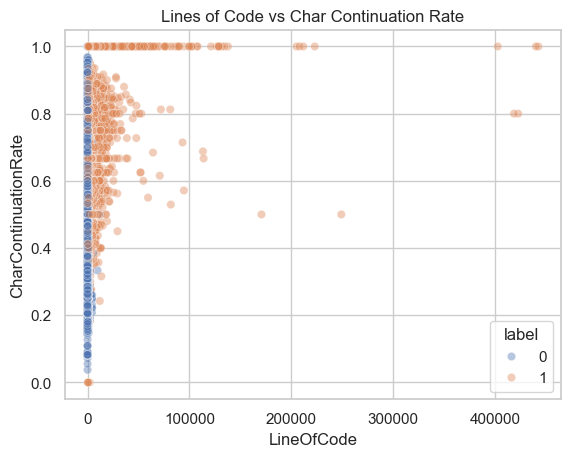

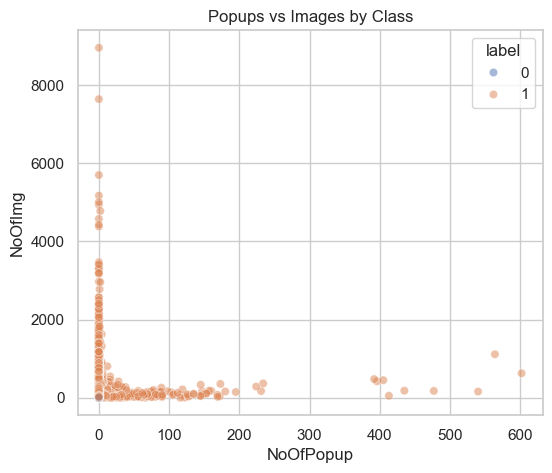

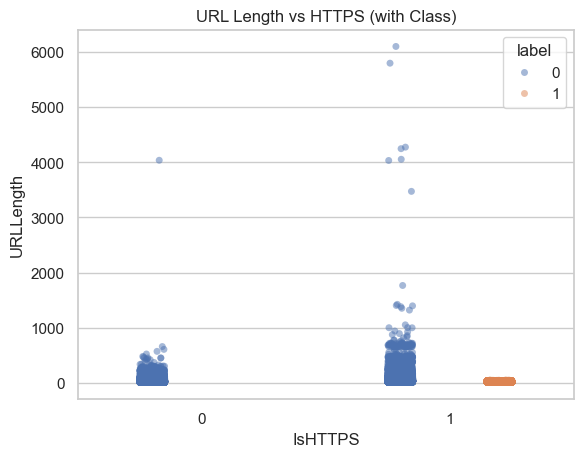

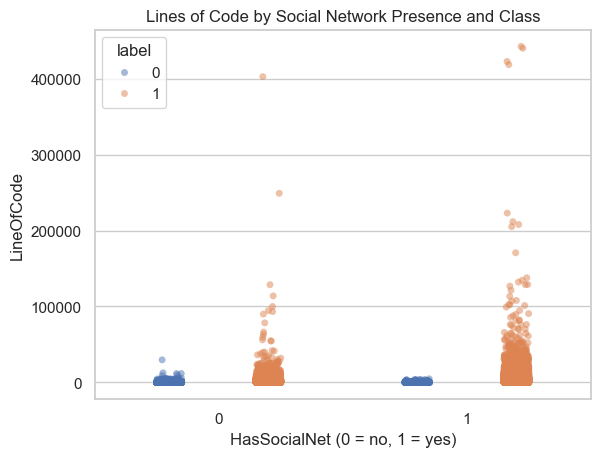

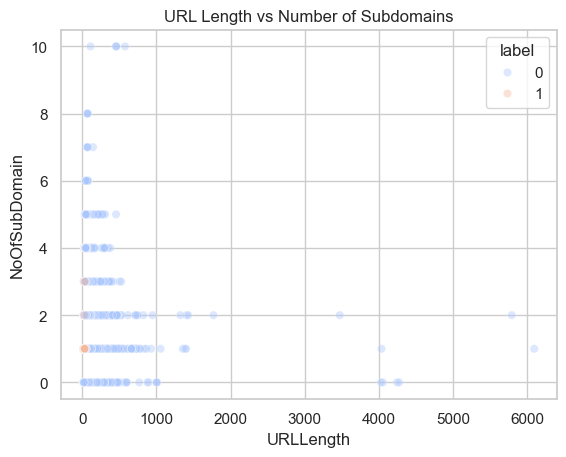

In [58]:
#BoxPlots (Outlers vs. OutlierExclusion)
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col
               )
    plt.title(f"{col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col,
                showfliers=False
               )
    plt.title(f"{col} by Class (Excluding Outliers)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=df_dedup, x="label", y="NoOfImage", showfliers=False)
plt.title("Number of Images by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfImg")
plt.show()

#ScatterPlots
## URL Len vs. Obfu Char
sns.scatterplot(
    data=df_dedup,
    x="URLLength",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Obfuscated Characters")
plt.show()

##Lines of Code vs. Externel Ref.
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="NoOfExternalRef",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Number of External References")
plt.show()

##Lines of Code vs. Obfuschar
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Obfuscated Characters")
plt.show()

##Char Cont Rate vs. LOC
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="CharContinuationRate",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Char Continuation Rate")
plt.show()

#Popups vs Images
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_dedup,
    x="NoOfPopup",
    y="NoOfImage",
    hue="label",
    alpha=0.5
)
plt.title("Popups vs Images by Class")
plt.xlabel("NoOfPopup")
plt.ylabel("NoOfImg")
plt.show()

#Strip Plot 
##HTTPS vs. URLLength
sns.stripplot(
    data=df_dedup,
    x="IsHTTPS",
    y="URLLength",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("URL Length vs HTTPS (with Class)")
plt.show()

##HasSocialNet vs Line of Code
sns.stripplot(
    data=df_dedup,
    x="HasSocialNet",
    y="LineOfCode",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("Lines of Code by Social Network Presence and Class")
plt.xlabel("HasSocialNet (0 = no, 1 = yes)")
plt.show()

sns.scatterplot(
    data=df_dedup,
    x="URLLength",
    y="NoOfSubDomain",
    hue="label",
    alpha=0.4,
    palette="coolwarm"
)
plt.title("URL Length vs Number of Subdomains")
plt.show()



Relationship between attributes and feature exploration summary

Feature exploration began with a correlation map to examine relationships among numeric attributes. While visualizing all pairwise correlations is challenging, filtering by correlation strength highlights feature pairs with strong relationships and identifies attributes most strongly associated with the target label. Highly correlated pairs such as URLTitleMatchScore and DomainTitleMatchScore suggest that legitimate websites tend to have stronger alignment between page titles and domains.

Analysis of correlations with the label indicates that legitimate websites are generally characterized by greater structural complexity, whereas phishing websites exhibit increased complexity within the URL itself. This pattern is reinforced by scatter plots showing that URLs containing obfuscated characters are typically longer and predominantly associated with phishing sites. In contrast, pages with a large number of lines of code rarely contain obfuscated characters, supporting the observation that phishing behavior concentrates complexity at the URL level rather than within page content.

Strip and box plots further emphasize that many visual patterns are more effective at identifying legitimate websites than phishing ones. Legitimate sites consistently use HTTPS and tend to have substantially more lines of code than phishing pages, while phishing sites display more variability and irregularity across multiple URL-based features. Overall, these relationships support retaining complex and extreme feature values for modeling rather than treating them as noise.

## Any New features that could be added or created from existing features.

Currently our dataset could be split into 4 groups. URL Structure, Character Structure, HTML, and MetaData. Starting with URLStructure, we would be able to collect parse our information from the URL like if it ends in a executable extenstion like .exe or .zip. You could also determine if the URL has country codes and which ones are used.

For character structures, There are specific characters that are tied to query like functions, instead of counting each instance of them, we could combine the NoOfEqualsInURL, NoOfQMarkInURL, and NoOfAmpersandInURL into one. These features are correlated with phishing sites.

For HTML Content, we could collate all resources that are on the HTML page into one large "resource" feature. Another possible avenue is to create the a ratio of empty references to total amount of references. Its likely that a phishing site just has alot of dead links.

For metadata, We could collect how long the domain has been active and the last time the link has been updated.

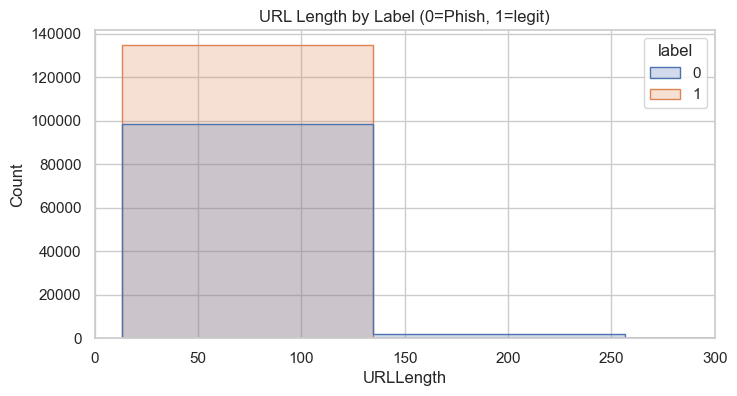

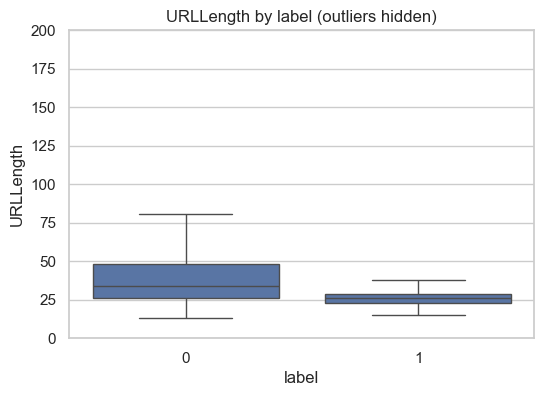

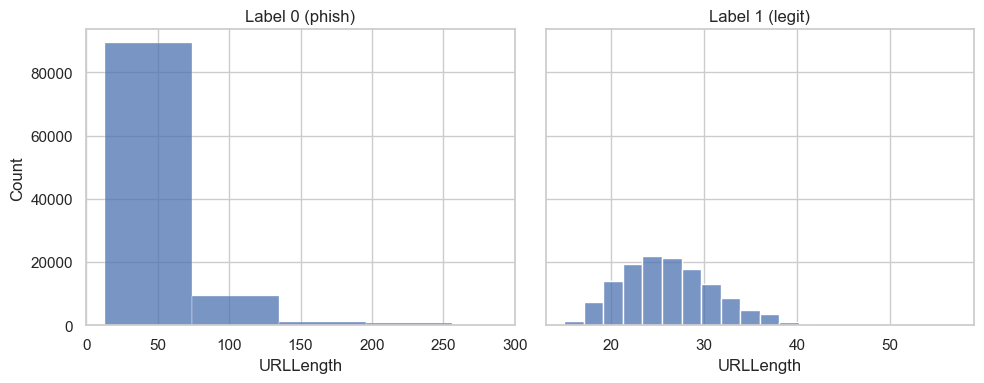

In [59]:
#Maybe get rid of this, if you cant find a place
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='URLLength', hue='label', bins=50, kde=False, element='step')
plt.title('URL Length by Label (0=Phish, 1=legit)')
plt.xlim(0, 300)
plt.show()

df.groupby('label')['URLLength'].agg(['count','min','max','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)
plt.ylim(0, 200)   # adjust upper limit until the box is readable
plt.title('URLLength by label (outliers hidden)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# phishing
sns.histplot(df[df['label']==0]['URLLength'], bins=100, ax=axes[0])
axes[0].set_title('Label 0 (phish)')
axes[0].set_xlim(0, 300)   # zoom so bars are visible

# legit
legit = df[df['label']==1]['URLLength']
sns.histplot(legit, bins=20, ax=axes[1])
axes[1].set_title('Label 1 (legit)')
axes[1].set_xlim(legit.min()-2, legit.max()+2)

plt.tight_layout()
plt.show()

## Addressing dimensionality with Principal Component analysis

To address high dimensionality, Principal Component Analysis (PCA) was applied to the continuous feature set. Features were first grouped into three categories—continuous, binary, and categorical. PCA was then performed exclusively on the continuous features, retaining enough principal components to explain 95% of the total variance. This process resulted in 21 principal components. A new feature matrix was subsequently created by combining these principal components with the original binary features, producing a consolidated dataset (X_combined) for use in downstream predictive modeling.

To evaluate the contribution of the principal components, both a scree plot and a cumulative explained variance plot were examined. The scree plot shows that the first principal component (PC1) accounts for over 20% of the total variance, PC2 explains approximately 13%, and PC3 contributes just over 5%. Beyond the first few components, each additional principal component contributes less than 4% individually. The cumulative explained variance plot indicates that approximately 12 principal components are required to capture 75% of the total variance.

Finally, the principal component loadings for the leading components were examined to better understand which original features contribute most strongly to each component. This analysis provides insight into the dominant patterns captured by PCA and supports interpretation of the reduced feature space.

Continuous: 31
Binary: 20
Categorical: 5
Original continuous features: 31
PCA components: 21
Variance explained by PCA: 0.96
Final combined features: 41 (PCA: 21 + Binary: 20)


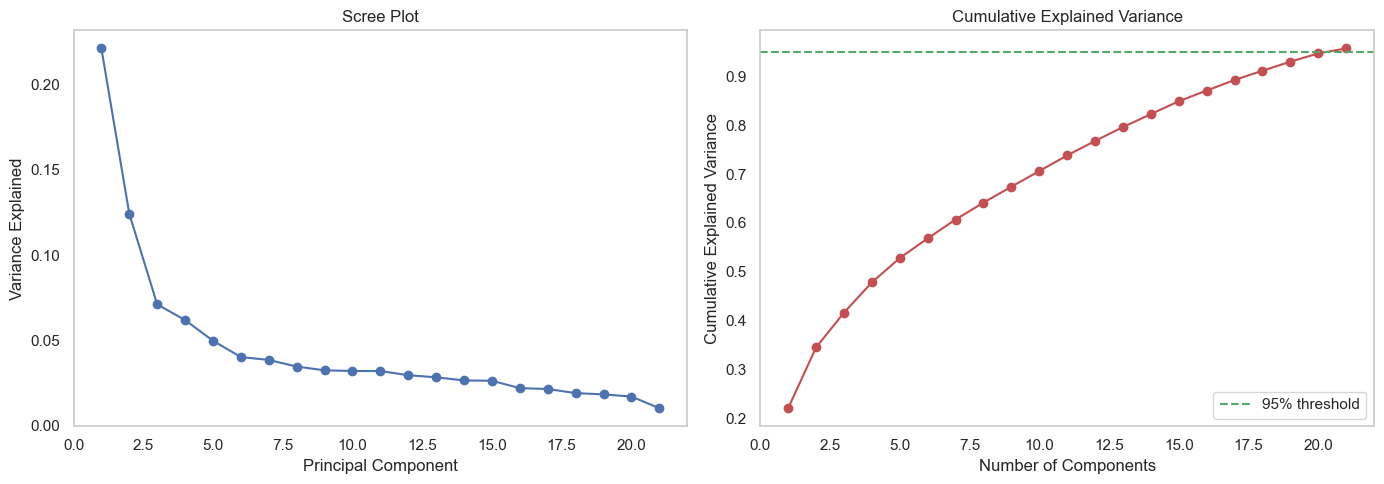

PCA Loadings (contribution of each variable to each component):
                                 PC1       PC2       PC3       PC4       PC5  \
URLLength                   0.294313  0.234208 -0.026693  0.138454  0.077344   
DomainLength                0.171180 -0.141025  0.035180  0.380597 -0.184794   
URLSimilarityIndex         -0.291875  0.184051  0.067610 -0.112286 -0.172627   
CharContinuationRate       -0.239736  0.236746 -0.160717 -0.095315  0.141916   
TLDLegitimateProb          -0.081171  0.136091 -0.236429  0.341331  0.037013   
URLCharProb                -0.200598  0.134364 -0.052798  0.179135 -0.437778   
TLDLength                  -0.013880  0.060005 -0.252124  0.335859  0.086280   
NoOfSubDomain               0.101451 -0.141528  0.288360 -0.021735 -0.319336   
NoOfObfuscatedChar          0.165049  0.339425  0.003797 -0.197808 -0.263217   
ObfuscationRatio            0.068690  0.105190  0.003851 -0.117832 -0.173904   
NoOfLettersInURL            0.265972  0.157970 -0.047795

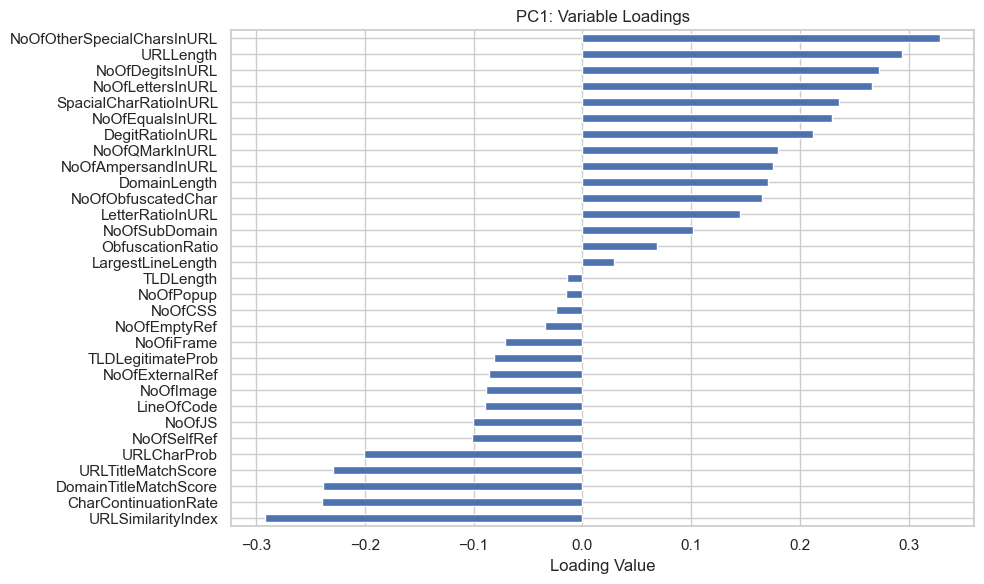

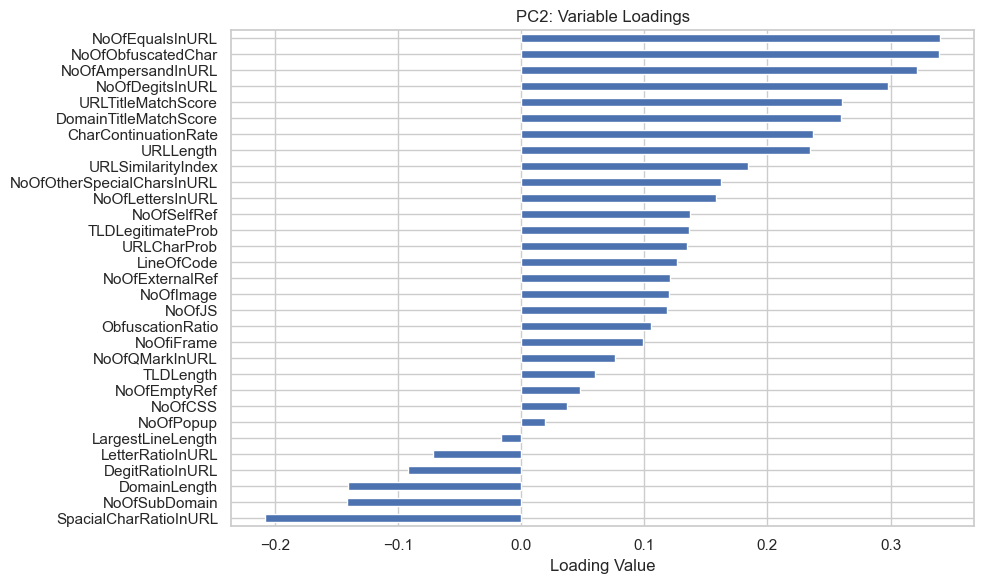

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#creating lists of feature types
continuous_features = [col for col in numeric_cols if df_dedup[col].nunique() > 2]
binary_features = [col for col in df_dedup.columns if df_dedup[col].nunique() == 2]
categorical_features = [col for col in df_dedup.columns if col not in numeric_cols and col != 'label']

print(f"Continuous: {len(continuous_features)}")
print(f"Binary: {len(binary_features)}")
print(f"Categorical: {len(categorical_features)}")

#creating PCA on continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dedup[continuous_features])

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original continuous features: {X_scaled.shape[1]}")
print(f"PCA components: {X_pca.shape[1]}")
print(f"Variance explained by PCA: {pca.explained_variance_ratio_.sum():.2f}")

X_combined = np.hstack([X_pca, df_dedup[binary_features].values])

print(f"Final combined features: {X_combined.shape[1]} (PCA: {X_pca.shape[1]} + Binary: {len(binary_features)})")

#Scree and Cumulative Variance Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


#Scree Plot
axes[0].plot(range(1, len(pca.explained_variance_ratio_)+1), 
             pca.explained_variance_ratio_, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Scree Plot')
axes[0].grid()

# Cumulative variance
axes[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             np.cumsum(pca.explained_variance_ratio_), 'ro-')
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

#Viewing the Makeup of the PCA Components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=continuous_features
)

print("PCA Loadings (contribution of each variable to each component):")
print(loadings)

# Bar chart for PC1
plt.figure(figsize=(10, 6))
loadings['PC1'].sort_values().plot(kind='barh')
plt.title('PC1: Variable Loadings')
plt.xlabel('Loading Value')
plt.tight_layout()
plt.show()

# Bar chart for PC2
plt.figure(figsize=(10, 6))
loadings['PC2'].sort_values().plot(kind='barh')
plt.title('PC2: Variable Loadings')
plt.xlabel('Loading Value')
plt.tight_layout()
plt.show()